# ËÆ≠ÁªÉÊÄùË∑Ø

LogicÔºö‰ªÖÈ¢ÑÊµãÊíÇËçíÂú∞‰∏äÂÖâ‰ºèÂª∫ËÆæÊ¶ÇÁéáÂç≥ÂèØÔºåÂä†ÂÖ•Â§öÊó∂Â∫èÂèØ‰ª•‰∏∞ÂØåÊ†∑Êú¨‰ø°ÊÅØ„ÄÅÂ≠¶‰π†Âà∞Â¢ûÈáèÊ†∑Êú¨Ë°®Á§∫

Êï∞ÊçÆÊµÅÔºö


ËæìÂÖ•Ôºö
1„ÄÅËÆ≠ÁªÉÊ†∑Êú¨ÔºàÂàíÂàÜËÆ≠ÁªÉÈõÜ„ÄÅÊµãËØïÈõÜÂêàÔºâÔºöÁæéÂõΩÂÖâ‰ºèÊ≠£Ê†∑Êú¨Ôºõ
2„ÄÅÈ¢ÑÊµãÊ†∑Êú¨ÔºöÁæéÂõΩÂÖâ‰ºèÁî®Âú∞Ôºõ

ËæìÂá∫ÔºöÂæóÂà∞

Êï∞ÊçÆÊìç‰ΩúÔºö

ÔºàÂÖàÁî®QQÂõæËßÇÂØüÂêÑ‰∏™Êï∞ÊçÆÁöÑÂàÜÂ∏ÉÁâπÂæÅÔºâÂØπ‰∫éÁ¨¶ÂêàÊ≠£ÊÄÅÂàÜÂ∏ÉÁâπÂæÅÂèØ‰ª•Áõ¥Êé•ËøõÂÖ•ËÅöÁ±ªÔºõ

1„ÄÅÊ†∑Êú¨Ê†áÂáÜÂåñÔºõ
2„ÄÅ


ÂêéÊúüÊï∞ÊçÆË°•ÈΩêÔºàÂêéÊúüÊ®°Âûã‰ºòÂåñÈúÄË¶ÅÊ≥®ÊÑèÁöÑpointÔºâ
1„ÄÅYÊï∞ÊçÆÊ∫êÁªü‰∏ÄÁöÑÈóÆÈ¢òÔºõ
2„ÄÅRËØ≠Ë®ÄÂåÖÈóÆÈ¢òËß£ÂÜ≥Ôºõd
3„ÄÅÊèêÂèñÂÖâ‰ºèY=1Ê≠£Ê†áÁ≠æÂØπÂ∫îÁöÑlandcoverÂ∫èÂàó

# Load Data

In [1]:
from function import *
import pandas as pd
import pandas as pd
import geopandas as gpd
from typing import Sequence



abandon_2d_variable = [
    "current_abandonment",
    "recultivation", 
    "abandonment_duration",
    "abandonment_year"
]
fea_3d_variable = [
    'GDPpc',
    'GDPtot',
    'GURdist',
    'Population',
    'gdmp',
    'rsds',
    'tas',
    'wind'
]
fea_2d_variable = [
    'DEM',
    'Powerdist',
    'PrimaryRoad',
    'SecondaryRoad',
    'Slope',
    'TertiaryRoad'
]
PATHS = {
    'abandonment': r"D:\xarray\merged_chunk_2\*.nc",
    'feature':     "D:/xarray/aligned2/Feature_all/*.nc",
    'csv':         "aligned_for_training0519.csv",
    'prediction':  "",
    'prediction_us': "",
    'test_output': "positive_samples_test_500.csv",
    'output':      "positive_samples_full_with_features.csv",
    'CN_sheng': r'data\sheng2022.shp',
    'World_shp': r'data\main_ADM_0.shp', 
    'us_abandon': r'data\us_abandon_clean.csv',
    'us_pv_embedding': r'data\training_embedding.csv'
}

ZERO_COLS = [
     'GDPpc', 'GDPtot', 'GURdist', 'Population',
    'PrimaryRoad', 'SecondaryRoad', 'TertiaryRoad', 'gdmp'
]
YEARS = [2018, 2020]

NUMERIC_FEATURES = [
    'lat','lon','GDPpc', 'GDPtot', 'GURdist', 'DEM','Slope',
    'Population','Powerdist','PrimaryRoad','SecondaryRoad','TertiaryRoad',
    'gdmp','rsds','tas','wind'
]
CAT_COLS = ['landcover']

ABANDON_COLS = ['abandonment_year','abandonment_duration', 'current_abandonment']

NONE_ABANDON_COLS = ['recultivation']

time=['2018-01-01','2020-01-01']





gogogo


# ‰∏ÄÈò∂ÊÆµÁõ∏‰ººÊÄßÂª∫Ê®°

## Êï∞ÊçÆÊ£ÄÊü•

In [7]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import (
    FunctionTransformer, QuantileTransformer,
    StandardScaler, MinMaxScaler, RobustScaler,
    OneHotEncoder
)
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

from function.data_utils import NUMERIC_FEATURES, CAT_COLS, ZERO_COLS, ABANDON_COLS, NONE_ABANDON_COLS
from function import *
import matplotlib.pyplot as plt


def check_transformed_data(X_trans, preproc, df_pos, feature_groups):
    """
    Ê£ÄÊü•ËΩ¨Êç¢ÂêéÁöÑÊï∞ÊçÆË¥®Èáè
    
    Args:
        X_trans: ËΩ¨Êç¢ÂêéÁöÑÊï∞ÊçÆ
        preproc: ColumnTransformerÂØπË±°
        df_pos: ÂéüÂßãÊï∞ÊçÆ
        feature_groups: ÁâπÂæÅÂàÜÁªÑÂ≠óÂÖ∏
    """
    # print("1. Âü∫Êú¨Ê£ÄÊü•:")
    # print("  - ÂåÖÂê´NaN:", np.isnan(X_trans).any())
    # print("  - ÂåÖÂê´inf:", np.isinf(X_trans).any())
    # print("  - Shape:", X_trans.shape)
    
    # print("\n2. Êï∞ÂÄºÁªüËÆ°:")
    # print("  - ÊúÄÂ∞èÂÄº:", X_trans.min())
    # print("  - ÊúÄÂ§ßÂÄº:", X_trans.max())
    # print("  - ÂùáÂÄº:", X_trans.mean())
    # print("  - Ê†áÂáÜÂ∑Æ:", X_trans.std())
    
    # Ê£ÄÊü•ÊØè‰∏™ÁâπÂæÅÁªÑÁöÑËΩ¨Êç¢ÁªìÊûú
    print("\n3. ÁâπÂæÅÁªÑÁªüËÆ°:")
    start_idx = 0
    for name, features in feature_groups.items():
        if name == 'cat_features':
            # ÂØπ‰∫éÁ±ªÂà´ÁâπÂæÅÔºåÈúÄË¶ÅËÆ°ÁÆóOneHotEncoderÁöÑËæìÂá∫ÁâπÂæÅÊï∞
            n_features = len(np.unique(df_pos[features].values))
        else:
            n_features = len(features)
            
        group_data = X_trans[:, start_idx:start_idx + n_features]
        print(f"\n{name}ÁâπÂæÅÁªÑ:")
        print(f"  - Shape: {group_data.shape}")
        print(f"  - ÂèñÂÄºËåÉÂõ¥: [{group_data.min():.3f}, {group_data.max():.3f}]")
        print(f"  - ÂùáÂÄº: {group_data.mean():.3f}")
        print(f"  - Ê†áÂáÜÂ∑Æ: {group_data.std():.3f}")
        start_idx += n_features
    
    return X_trans

## KDEÊ®°Âûã

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import (
    FunctionTransformer, QuantileTransformer,
    RobustScaler, StandardScaler, MinMaxScaler,
    OneHotEncoder
)
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KernelDensity
from sklearn.impute import SimpleImputer  # Ê∑ªÂä†Ëøô‰∏™ÂØºÂÖ•

# ==============================
# ÂÆö‰πâÂ∏∏ÈáèÔºàÂ¶ÇÊûúËøòÊ≤°ÊúâÂÆö‰πâÁöÑËØùÔºâ
# ==============================

# Â¶ÇÊûúÊ≤°ÊúâÂÆö‰πâCAT_COLSÔºåËØ∑Âú®ËøôÈáåÂÆö‰πâ
CAT_COLS = ['landcover']  # Ê†πÊçÆ‰Ω†ÁöÑÊï∞ÊçÆË∞ÉÊï¥

# ==============================
# ËæÖÂä©ÂáΩÊï∞
# ==============================

def safe_log1p(x, lower_bound=-1 + 1e-6):
    """
    ÂØπ x ÂÅö log1p ÂâçÔºåÁ°Æ‰øù x > lower_bound
    """
    arr = np.array(x, dtype=float)
    arr = np.where(arr <= lower_bound, lower_bound, arr)
    return np.log1p(arr)

def replace_inf_with_nan(X):
    """
    Â∞ÜÊï∞ÁªÑ‰∏≠ÁöÑ ¬±Inf ÊõøÊç¢‰∏∫ NaNÔºåÊñπ‰æøÂêéÁª≠Â°´ÂÖÖ
    """
    X = np.array(X, dtype=float)
    X[~np.isfinite(X)] = np.nan
    return X

# ==============================
# 1. KDE Ê®°ÂûãËÆ≠ÁªÉÂáΩÊï∞
# ==============================

def select_and_train_kde(df_pos: pd.DataFrame, bandwidths: list = None):
    """
    ÈÄâÊã©ÂíåËÆ≠ÁªÉKDEÊ®°Âûã„ÄÇ
    """
    # ÁâπÂæÅÂàÜÁªÑ
    LOG = ['GDPpc', 'GDPtot', 'Population', 'Powerdist']
    DEM_SLOPE = ['DEM', 'Slope']
    DIST = ['GURdist', 'PrimaryRoad', 'SecondaryRoad', 'TertiaryRoad']
    NORMAL = ['tas', 'gdmp', 'rsds', 'wind']
    CAT = CAT_COLS.copy()

    # Êï∞ÂÄºÁâπÂæÅÊµÅÊ∞¥Á∫ø
    log_pipe = make_pipeline(
        FunctionTransformer(replace_inf_with_nan),
        SimpleImputer(strategy='median'),
        FunctionTransformer(lambda X: safe_log1p(X), validate=False),
        QuantileTransformer(n_quantiles=1000, output_distribution='normal', random_state=0)
    )

    dem_slope_pipe = make_pipeline(
        FunctionTransformer(replace_inf_with_nan),
        SimpleImputer(strategy='median'),
        FunctionTransformer(lambda X: safe_log1p(X - X.min(axis=0) + 1e-6), validate=False),
        QuantileTransformer(n_quantiles=1000, output_distribution='normal', random_state=0)
    )

    dist_pipe = make_pipeline(
        FunctionTransformer(replace_inf_with_nan),
        SimpleImputer(strategy='median'),
        FunctionTransformer(lambda X: safe_log1p(X), validate=False),
        RobustScaler()
    )

    normal_pipe = make_pipeline(
        SimpleImputer(strategy='median'),
        StandardScaler()
    )

    # Á±ªÂà´ÁâπÂæÅÂ§ÑÁêÜÊµÅÊ∞¥Á∫ø
    cat_pipe = make_pipeline(
        SimpleImputer(strategy='most_frequent'),
        OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    )

    # Êï¥‰ΩìÈ¢ÑÂ§ÑÁêÜÂô®
    preproc = make_column_transformer(
        (log_pipe, LOG),
        (dem_slope_pipe, DEM_SLOPE),
        (dist_pipe, DIST),
        (normal_pipe, NORMAL),
        (cat_pipe, CAT),
        remainder='drop'
    )

    # ÊûÑÂª∫Pipeline
    full_pipe = Pipeline([
        ('preprocessor', preproc),
        ('kde', KernelDensity(kernel='gaussian', atol=1e-8, rtol=1e-4))
    ])

    # Â∏¶ÂÆΩÂÄôÈÄâ
    if bandwidths is None:
        bandwidths = np.logspace(-2, -1, 20)

    # ÁΩëÊ†ºÊêúÁ¥¢Â∏¶ÂÆΩ
    grid = GridSearchCV(
        estimator=full_pipe,
        param_grid={'kde__bandwidth': bandwidths},
        cv=5,
        n_jobs=-1
    )
    
    # Ê∑ªÂä†ÈîôËØØÂ§ÑÁêÜ
    try:
        grid.fit(df_pos)
    except Exception as e:
        print("ËÆ≠ÁªÉËøáÁ®ã‰∏≠Âá∫Áé∞ÈîôËØØ:")
        print(e)
        print("\nËæìÂÖ•Êï∞ÊçÆ‰ø°ÊÅØ:")
        print("ÂΩ¢Áä∂:", df_pos.shape)
        print("\nÁâπÂæÅÁ±ªÂûã:")
        print(df_pos.dtypes)
        print("\nÊòØÂê¶ÊúâÁº∫Â§±ÂÄº:")
        print(df_pos.isna().sum())
        raise

    # ËæìÂá∫ÊúÄ‰Ω≥ÁªìÊûú
    best_bw = grid.best_params_['kde__bandwidth']
    print(f"ÊúÄ‰Ω≥Â∏¶ÂÆΩ: {best_bw}")
    print(f"ÊúÄ‰Ω≥Âπ≥ÂùáÂØπÊï∞‰ººÁÑ∂: {grid.best_score_:.3f}")
    print("\nÂêÑÂÄôÈÄâÂ∏¶ÂÆΩÁöÑÂπ≥ÂùáÂØπÊï∞‰ººÁÑ∂Ôºö")
    for bw, score in zip(grid.cv_results_['param_kde__bandwidth'], 
                        grid.cv_results_['mean_test_score']):
        print(f"  h={bw:.4g} ‚Üí log-lik={score:.3f}")

    return grid.best_estimator_

# ==============================
# 2. ÁéØÂ¢ÉÂæóÂàÜÂáΩÊï∞
# ==============================

def score_env(kde_pipeline: Pipeline, df_query: pd.DataFrame,
              method: str = 'sigmoid', sigmoid_alpha: float = None):
    """
    ‰ΩøÁî®ËÆ≠ÁªÉÂ•ΩÁöÑ KDE Pipeline ËÆ°ÁÆóÁéØÂ¢ÉÁõ∏‰ººÂ∫¶ÂæóÂàÜ
    """
    # ËÆ°ÁÆóÂéüÂßãÂØπÊï∞ÂØÜÂ∫¶‰∏éÂØÜÂ∫¶
    logdens = kde_pipeline.score_samples(df_query)
    dens = np.exp(logdens)

    # ÂΩí‰∏ÄÂåñÊñπÊ≥ïÈÄâÊã©
    if method == 'minmax':
        scores = (logdens - logdens.min()) / (logdens.max() - logdens.min())
    elif method == 'quantile':
        qt = QuantileTransformer(output_distribution='uniform',
                                 n_quantiles=min(1000, len(logdens)), random_state=0)
        scores = qt.fit_transform(logdens.reshape(-1,1)).ravel()
    elif method == 'zscore':
        z = (logdens - logdens.mean()) / logdens.std()
        scores = (z - z.min()) / (z.max() - z.min())
    elif method == 'sigmoid':
        beta = np.median(logdens)
        if sigmoid_alpha is None:
            rng = logdens.max() - logdens.min()
            sigmoid_alpha = (2 * np.log(19)) / rng
        scores = 1 / (1 + np.exp(-sigmoid_alpha * (logdens - beta)))
    else:
        raise ValueError("method must be 'minmax', 'quantile', 'zscore', or 'sigmoid'")

    return dens, scores

# ==============================
# 3. ÂèØÈÄâÁöÑÊï∞ÊçÆÊ£ÄÊü•ÂáΩÊï∞
# ==============================

def inspect_kde_data(df_train, df_test, feature_names):
    print("ËÆ≠ÁªÉÈõÜÂΩ¢Áä∂:", df_train.shape)
    print("ÊµãËØïÈõÜÂΩ¢Áä∂:", df_test.shape)
    fig, axes = plt.subplots(len(feature_names), 2, figsize=(15, 4*len(feature_names)))
    for i, feat in enumerate(feature_names):
        axes[i,0].hist(df_train[feat], bins=30, alpha=0.5); axes[i,0].set_title(f'Train: {feat}')
        axes[i,1].hist(df_test[feat],  bins=30, alpha=0.5); axes[i,1].set_title(f'Test:  {feat}')
    plt.tight_layout(); plt.show()
    print("\nËÆ≠ÁªÉÈõÜÁªüËÆ°:"); print(df_train.describe())
    print("\nÊµãËØïÈõÜÁªüËÆ°:"); print(df_test.describe())






## Ê®°ÂûãÊÄßËÉΩËØäÊñ≠

In [9]:
def comprehensive_model_diagnosis_fixed(df_embedding, df_abandon, features_no_coords, 
                                      test_size=0.2, random_state=42):
    """
    Comprehensive model diagnosis function (fixed version)
    """
    from sklearn.model_selection import train_test_split
    from sklearn.inspection import permutation_importance
    import warnings
    warnings.filterwarnings('ignore')
    
    print("=" * 80)
    print("KDE Model Comprehensive Diagnosis Report")
    print("=" * 80)
    
    # 1. Data preparation and train/validation split
    print("\n1. Data Preparation and Train/Validation Split")
    print("-" * 50)
    
    # Ensure data size consistency
    min_size = min(len(df_embedding), len(df_abandon))
    df_embedding_subset = df_embedding.head(min_size)
    df_abandon_subset = df_abandon.head(min_size)
    
    # Split train and validation sets
    df_train, df_val = train_test_split(
        df_embedding_subset[features_no_coords], 
        test_size=test_size, 
        random_state=random_state
    )
    
    print(f"Train set size: {df_train.shape}")
    print(f"Validation set size: {df_val.shape}")
    print(f"Split ratio: Train {(1-test_size)*100:.1f}%, Validation {test_size*100:.1f}%")
    
    # 2. Model training and hyperparameter tuning
    print("\n2. Model Training and Hyperparameter Tuning")
    print("-" * 50)
    
    # Train model on train set
    kde_pipe = select_and_train_kde(df_train, bandwidths=np.logspace(-3, 3, 100))
    
    # Get best parameter
    best_bw = kde_pipe.named_steps['kde'].bandwidth
    print(f"Best bandwidth: {best_bw}")
    
    # 3. Model performance evaluation
    print("\n3. Model Performance Evaluation")
    print("-" * 50)
    
    # Compute density for train and validation sets
    train_dens = kde_pipe.score_samples(df_train)
    val_dens = kde_pipe.score_samples(df_val)
    
    # Compute log-likelihood
    train_score = np.mean(train_dens)
    val_score = np.mean(val_dens)
    
    print(f"Train set mean log-likelihood: {train_score:.3f}")
    print(f"Validation set mean log-likelihood: {val_score:.3f}")
    print(f"Performance difference (Train - Validation): {train_score - val_score:.3f}")
    
    # Overfitting detection
    if train_score - val_score > 1000:
        print("Overfitting status: ‚ùå Warning - Significant overfitting detected")
    elif train_score - val_score > 100:
        print("Overfitting status: ‚ö†Ô∏è Caution - Mild overfitting detected")
    else:
        print("Overfitting status: ‚úÖ Good - No significant overfitting")
    
    # 4. Feature importance analysis
    print("\n4. Feature Importance Analysis")
    print("-" * 50)
    
    try:
        print("Calculating feature importance...")
        
        # Baseline model for feature importance
        from sklearn.ensemble import RandomForestRegressor
        rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
        
        # Use density as target variable
        rf_model.fit(df_train, train_dens)
        
        # Permutation importance
        perm_importance = permutation_importance(
            rf_model, df_val, val_dens, 
            n_repeats=5, random_state=42, n_jobs=-1
        )
        
        # Sort feature importance
        feature_importance = {}
        for i, feature in enumerate(features_no_coords):
            feature_importance[feature] = perm_importance.importances_mean[i]
        
        sorted_features = sorted(feature_importance.items(), 
                               key=lambda x: x[1], reverse=True)
        
        print("Feature importance ranking (based on permutation importance):")
        for i, (feature, importance) in enumerate(sorted_features, 1):
            print(f"  {i:2d}. {feature:<15} : {importance:12.6f}")
            
    except Exception as e:
        print(f"Feature importance calculation failed: {e}")
        feature_importance = {}
    
    # 5. Density distribution analysis
    print("\n5. Density Distribution Analysis")
    print("-" * 50)
    
    print("Train set density statistics:")
    print(f"  Mean: {np.mean(train_dens):.6f}, Std: {np.std(train_dens):.6f}")
    print(f"  Range: [{np.min(train_dens):.6f}, {np.max(train_dens):.6f}]")
    
    print("Validation set density statistics:")
    print(f"  Mean: {np.mean(val_dens):.6f}, Std: {np.std(val_dens):.6f}")
    print(f"  Range: [{np.min(val_dens):.6f}, {np.max(val_dens):.6f}]")
    
    # 6. Generate diagnostic plots
    print("\n6. Generate Diagnostic Plots")
    print("-" * 50)
    
    try:
        generate_diagnosis_plots_fixed(
            kde_pipe, df_train, df_val, 
            train_dens, val_dens, 
            feature_importance, features_no_coords
        )
        print("‚úÖ Diagnostic plots generated successfully")
    except Exception as e:
        print(f"‚ùå Plot generation failed: {e}")
    
    # 7. Overall evaluation and suggestions
    print("\n7. Overall Evaluation and Suggestions")
    print("-" * 50)
    
    print("Model diagnosis summary:")
    print(f"- Data size: {len(df_train)} train samples, {len(df_val)} validation samples")
    print(f"- Number of features: {len(features_no_coords)}")
    print(f"- Best bandwidth: {best_bw:.6f}")
    print(f"- Overfitting degree: {'High' if train_score - val_score > 1000 else 'Medium' if train_score - val_score > 100 else 'Low'}")
    
    if train_score - val_score > 1000:
        print("\nSuggestions:")
        print("- Consider increasing regularization or reducing model complexity")
        print("- Check data quality and feature engineering")
        print("- Consider using cross-validation to select a more appropriate bandwidth")
    
    return {
        'model': kde_pipe,
        'train_data': df_train,
        'val_data': df_val,
        'train_dens': train_dens,
        'val_dens': val_dens,
        'feature_importance': feature_importance,
        'diagnosis_summary': {
            'best_bandwidth': best_bw,
            'train_score': train_score,
            'val_score': val_score,
            'overfitting': train_score - val_score
        }
    }

def generate_diagnosis_plots_fixed(kde_pipe, df_train, df_val, train_dens, val_dens, 
                                  feature_importance, features_no_coords):
    """
    Fixed version of diagnostic plot generation function (English labels)
    """
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    # Ensure data size consistency
    min_size = min(len(train_dens), len(val_dens))
    train_dens_subset = train_dens[:min_size]
    val_dens_subset = val_dens[:min_size]
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    
    # 1. Train set density distribution
    axes[0, 0].hist(train_dens_subset, bins=50, alpha=0.7, color='blue')
    axes[0, 0].set_title('Train Density Distribution')
    axes[0, 0].set_xlabel('Density Value')
    axes[0, 0].set_ylabel('Frequency')
    
    # 2. Validation set density distribution
    axes[0, 1].hist(val_dens_subset, bins=50, alpha=0.7, color='orange')
    axes[0, 1].set_title('Validation Density Distribution')
    axes[0, 1].set_xlabel('Density Value')
    axes[0, 1].set_ylabel('Frequency')
    
    # 3. Feature importance bar chart
    if feature_importance:
        top_features = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)[:10]
        features, importances = zip(*top_features)
        axes[0, 2].barh(range(len(features)), importances)
        axes[0, 2].set_yticks(range(len(features)))
        axes[0, 2].set_yticklabels(features)
        axes[0, 2].set_title('Feature Importance (Top 10)')
        axes[0, 2].set_xlabel('Importance Score')
    
    # 4. Density scatter plot (train vs validation)
    axes[1, 0].scatter(train_dens_subset, val_dens_subset, alpha=0.6)
    min_val = min(train_dens_subset.min(), val_dens_subset.min())
    max_val = max(train_dens_subset.max(), val_dens_subset.max())
    axes[1, 0].plot([min_val, max_val], [min_val, max_val], 'r--', alpha=0.8)
    axes[1, 0].set_xlabel('Train Density')
    axes[1, 0].set_ylabel('Validation Density')
    axes[1, 0].set_title('Train vs Validation Density Comparison')
    
    # 5. Density boxplot comparison
    density_data = [train_dens_subset, val_dens_subset]
    axes[1, 1].boxplot(density_data, labels=['Train', 'Validation'])
    axes[1, 1].set_title('Density Value Distribution Comparison')
    axes[1, 1].set_ylabel('Density Value')
    
    # 6. Feature correlation heatmap
    if len(features_no_coords) > 1:
        corr_matrix = df_train[features_no_coords].corr()
        sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0, 
                   ax=axes[1, 2], cbar_kws={'shrink': 0.8})
        axes[1, 2].set_title('Feature Correlation Matrix')
    
    plt.tight_layout()
    plt.show()

## ‰∫åÈò∂ÊÆµÊ∑±Â∫¶Â≠¶‰π†

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set matplotlib to use English fonts
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans', 'Liberation Sans', 'sans-serif']
matplotlib.rcParams['axes.unicode_minus'] = False

# Check if TensorFlow is available
try:
    import tensorflow as tf
    from tensorflow import keras
    from tensorflow.keras import layers
    TENSORFLOW_AVAILABLE = True
    print("‚úÖ TensorFlow available")
except ImportError:
    TENSORFLOW_AVAILABLE = False
    print("‚ùå TensorFlow not available, skipping deep learning section")

# ---- SciKeras ÂåÖË£ÖÂô®ÔºàÁî®‰∫éÂ≠¶‰π†Êõ≤Á∫øÔºâ----
try:
    from scikeras.wrappers import KerasClassifier
    SCIKERAS_AVAILABLE = True
    print("‚úÖ SciKeras available for learning curves")
except Exception:
    SCIKERAS_AVAILABLE = False
    print("‚ùå SciKeras not available, will use manual learning curves")

def generate_negative_samples_from_abandon(df_embedding, df_abandon, features_no_coords, 
                                         kde_pipe, negative_ratio=0.1, 
                                         random_state=42):
    """
    ‰ªéÊíÇËçíÂú∞‰∏≠ÊèêÂèñKDEËØÑÂàÜÊúÄ‰ΩéÁöÑÊ†∑Êú¨‰Ωú‰∏∫Ë¥üÊ†∑Êú¨ÔºåÁâ∫Áâ≤ÈÉ®ÂàÜÊï∞ÊçÆ‰ª•ÊèêÈ´òÊ≥õÂåñËÉΩÂäõ
    """
    print("=" * 60)
    print("Extracting negative samples from df_abandon (sacrificing some data for generalization)")
    print("=" * 60)
    
    # 1. ËÆ°ÁÆóÊâÄÊúâÊíÇËçíÂú∞ÁöÑKDEÁéØÂ¢ÉÁõ∏‰ººÊÄßËØÑÂàÜ
    print("1. Calculating KDE environmental similarity for all abandoned land...")
    dens, env_scores = score_env(kde_pipe, df_abandon[features_no_coords], 
                                method='sigmoid', sigmoid_alpha=0.5)
    
    # 2. Â∞ÜÁõ∏‰ººÊÄßËØÑÂàÜÊ∑ªÂä†Âà∞ÊíÇËçíÂú∞Êï∞ÊçÆ‰∏≠
    df_abandon_with_scores = df_abandon.copy()
    df_abandon_with_scores['kde_score'] = env_scores
    
    # 3. ÊåâKDEËØÑÂàÜÂçáÂ∫èÊéíÂàóÔºàËØÑÂàÜË∂ä‰Ωé = Ë∂ä‰∏çÈÄÇÂêàÂÖâ‰ºèÈÉ®ÁΩ≤Ôºâ
    df_abandon_sorted = df_abandon_with_scores.sort_values('kde_score', ascending=True)
    
    # 4. Á°ÆÂÆöË¥üÊ†∑Êú¨Êï∞Èáè
    n_negative = int(len(df_embedding) * negative_ratio)
    
    print(f"Number of positive samples: {len(df_embedding)}")
    print(f"Target number of negative samples: {n_negative}")
    print(f"Negative sample ratio: {negative_ratio:.1f}")
    
    # 5. ÊèêÂèñKDEËØÑÂàÜÊúÄ‰ΩéÁöÑÊ†∑Êú¨‰Ωú‰∏∫Ë¥üÊ†∑Êú¨
    df_negative = df_abandon_sorted.head(n_negative)[features_no_coords].copy()
    
    # 6. Ââ©‰ΩôÁöÑÊíÇËçíÂú∞Áî®‰∫éÊúÄÁªàÈ¢ÑÊµã
    df_abandon_for_prediction = df_abandon_sorted.iloc[n_negative:][features_no_coords].copy()
    
    # 7. Ê∑ªÂä†Ê†áÁ≠æ
    df_positive = df_embedding[features_no_coords].copy()
    df_positive['label'] = 1
    df_negative['label'] = 0
    
    # 8. ÂêàÂπ∂ËÆ≠ÁªÉÊï∞ÊçÆ
    df_combined = pd.concat([df_positive, df_negative], ignore_index=True)
    
    print(f"\nDataset split:")
    print(f"  Positive samples: {len(df_positive)} (PV deployment data)")
    print(f"  Negative samples: {len(df_negative)} (lowest KDE scoring abandoned land)")
    print(f"  Total training set: {len(df_combined)}")
    print(f"  Positive:Negative ratio: 1:{len(df_negative)/len(df_positive):.2f}")
    
    print(f"\nPrediction data:")
    print(f"  Remaining abandoned land: {len(df_abandon_for_prediction)} (for final prediction)")
    print(f"  Sacrificed data ratio: {len(df_negative)/(len(df_negative)+len(df_abandon_for_prediction))*100:.1f}%")
    
    return df_positive, df_negative, df_combined, df_abandon_for_prediction

def build_deep_learning_model(input_dim, hidden_layers=[128, 64, 32], dropout_rate=0.3):
    """ÊûÑÂª∫Ê∑±Â∫¶Â≠¶‰π†ÂàÜÁ±ªÂô®"""
    if not TENSORFLOW_AVAILABLE:
        raise ImportError("TensorFlow not available, cannot build deep learning model")
    
    print("Building deep learning model...")
    
    # ËæìÂÖ•Â±Ç
    inputs = keras.Input(shape=(input_dim,))
    
    # ÁâπÂæÅÊ†áÂáÜÂåñ
    x = layers.BatchNormalization()(inputs)
    
    # ÈöêËóèÂ±Ç
    for i, units in enumerate(hidden_layers):
        x = layers.Dense(units, activation='relu', 
                        kernel_regularizer=keras.regularizers.l2(0.01))(x)
        x = layers.BatchNormalization()(x)
        x = layers.Dropout(dropout_rate)(x)
    
    # ËæìÂá∫Â±Ç
    outputs = layers.Dense(1, activation='sigmoid')(x)
    
    # ÊûÑÂª∫Ê®°Âûã
    model = keras.Model(inputs=inputs, outputs=outputs)
    
    # ÁºñËØëÊ®°Âûã
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy', 'precision', 'recall', 'auc']
    )
    
    print("Model architecture:")
    print(f"Input dimension: {input_dim}")
    print(f"Hidden layers: {hidden_layers}")
    print(f"Total parameters: {model.count_params():,}")
    
    return model


def plot_learning_curves(X_train, y_train, input_dim, epochs=50, batch_size=32):
    """ÁªòÂà∂Â≠¶‰π†Êõ≤Á∫ø - ÊåâÁÖßÁªü‰∏ÄÊ†∑ÂºèËÆæËÆ°"""
    print("=" * 60)
    print("Generating Learning Curves")
    print("=" * 60)
    
    X = np.asarray(X_train)
    y = np.asarray(y_train).ravel()
    
    # Áªü‰∏ÄÈÖçËâ≤ÊñπÊ°à
    base_colors = ['#D81B60', '#1E88E5', '#F9A825', '#00695C']
    
    # ‰ºòÂÖà‰ΩøÁî®SciKeras
    if SCIKERAS_AVAILABLE:
        try:
            from sklearn.model_selection import learning_curve, StratifiedKFold
            
            # SciKerasÊûÑÈÄ†Âô®
            def make_model_for_scikeras():
                return build_deep_learning_model(
                    input_dim=input_dim,
                    hidden_layers=[128, 64, 32],
                    dropout_rate=0.3
                )
            
            clf = KerasClassifier(
                model=make_model_for_scikeras,
                epochs=epochs,
                batch_size=batch_size,
                verbose=0
            )
            
            cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
            train_sizes = np.linspace(0.1, 1.0, 8)
            
            sizes, train_scores, val_scores = learning_curve(
                clf, X, y,
                train_sizes=train_sizes,
                cv=cv,
                n_jobs=-1,
                scoring='accuracy',
                shuffle=True,
                random_state=42
            )
            
            train_mean = np.mean(train_scores, axis=1)
            train_std = np.std(train_scores, axis=1)
            val_mean = np.mean(val_scores, axis=1)
            val_std = np.std(val_scores, axis=1)
            
            # ÂàõÂª∫2x2Â∏ÉÂ±Ä
            fig, axes = plt.subplots(2, 2, figsize=(12, 8))
            axes = axes.flatten()
            
            # 1. Â≠¶‰π†Êõ≤Á∫ø
            ax = axes[0]
            ax.plot(sizes, train_mean, 'o-', lw=2.5, alpha=0.9, 
                    color=base_colors[0], label='Training Accuracy')
            ax.fill_between(sizes, train_mean-train_std, train_mean+train_std, 
                           alpha=0.15, color=base_colors[0])
            ax.plot(sizes, val_mean, 'o-', lw=2.5, alpha=0.9, 
                    color=base_colors[1], label='CV Accuracy')
            ax.fill_between(sizes, val_mean-val_std, val_mean+val_std, 
                           alpha=0.15, color=base_colors[1])
            ax.set_title('a. Learning Curves (SciKeras)', fontsize=12, fontweight='bold', pad=10)
            ax.set_xlabel('Training Set Size', fontsize=10)
            ax.set_ylabel('Accuracy', fontsize=10)
            ax.legend(fontsize=10)
            ax.grid(True, alpha=0.3, linestyle='-', linewidth=0.5, zorder=0)
            ax.set_axisbelow(True)
            ax.spines['top'].set_visible(False)
            ax.tick_params(axis='both', which='major', labelsize=10, colors='black')
            
            # 2. ËøáÊãüÂêàÊ£ÄÊµã
            ax = axes[1]
            gap = train_mean - val_mean
            ax.plot(sizes, gap, 'o-', lw=2.5, alpha=0.9, 
                    color=base_colors[2], label='Train - CV Gap')
            ax.axhline(0.05, ls='--', color='red', alpha=0.7, lw=1.5, label='Threshold 5%')
            ax.set_title('b. Overfitting Detection', fontsize=12, fontweight='bold', pad=10)
            ax.set_xlabel('Training Set Size', fontsize=10)
            ax.set_ylabel('Accuracy Gap', fontsize=10)
            ax.legend(fontsize=10)
            ax.grid(True, alpha=0.3, linestyle='-', linewidth=0.5, zorder=0)
            ax.set_axisbelow(True)
            ax.spines['top'].set_visible(False)
            ax.tick_params(axis='both', which='major', labelsize=10, colors='black')
            
            # 3. ËÆ≠ÁªÉÂáÜÁ°ÆÁéáÊ†áÂáÜÂ∑Æ
            ax = axes[2]
            ax.fill_between(sizes, train_mean-train_std, train_mean+train_std, 
                           alpha=0.3, color=base_colors[0], label='Training ¬± Std')
            ax.plot(sizes, train_mean, 'o-', lw=2.5, alpha=0.9, 
                    color=base_colors[0])
            ax.set_title('c. Training Accuracy Variability', fontsize=12, fontweight='bold', pad=10)
            ax.set_xlabel('Training Set Size', fontsize=10)
            ax.set_ylabel('Accuracy', fontsize=10)
            ax.legend(fontsize=10)
            ax.grid(True, alpha=0.3, linestyle='-', linewidth=0.5, zorder=0)
            ax.set_axisbelow(True)
            ax.spines['top'].set_visible(False)
            ax.tick_params(axis='both', which='major', labelsize=10, colors='black')
            
            # 4. È™åËØÅÂáÜÁ°ÆÁéáÊ†áÂáÜÂ∑Æ
            ax = axes[3]
            ax.fill_between(sizes, val_mean-val_std, val_mean+val_std, 
                           alpha=0.3, color=base_colors[1], label='CV ¬± Std')
            ax.plot(sizes, val_mean, 'o-', lw=2.5, alpha=0.9, 
                    color=base_colors[1])
            ax.set_title('d. Cross-Validation Accuracy Variability', fontsize=12, fontweight='bold', pad=10)
            ax.set_xlabel('Training Set Size', fontsize=10)
            ax.set_ylabel('Accuracy', fontsize=10)
            ax.legend(fontsize=10)
            ax.grid(True, alpha=0.3, linestyle='-', linewidth=0.5, zorder=0)
            ax.set_axisbelow(True)
            ax.spines['top'].set_visible(False)
            ax.tick_params(axis='both', which='major', labelsize=10, colors='black')
            
            # ÊÄªÊ†áÈ¢ò
            fig.suptitle('Learning Curve Analysis (SciKeras)', 
                         y=0.98, fontsize=14, weight='bold')
            
            plt.tight_layout()
            plt.subplots_adjust(top=0.92)
            plt.show()
            
            print("\nLearning Curve Analysis (SciKeras):")
            print(f"Final training accuracy: {train_mean[-1]:.4f}")
            print(f"Final CV accuracy      : {val_mean[-1]:.4f}")
            print(f"Final accuracy gap     : {gap[-1]:.4f}")
            if gap[-1] > 0.05:
                print("‚ö†Ô∏è  Warning: Potential overfitting (gap > 5%).")
            else:
                print("‚úÖ  No obvious overfitting.")
            
            return sizes, train_scores, val_scores, gap
            
        except Exception as e:
            print(f"‚ùå SciKeras learning curve failed: {e}")
            print("Falling back to manual learning curve...")
    
    # ÊâãÂä®ÂÆûÁé∞Â≠¶‰π†Êõ≤Á∫øÔºàÂÖúÂ∫ïÊñπÊ°àÔºâ
    try:
        from sklearn.model_selection import StratifiedShuffleSplit
        
        # ÂàÜÂâ≤ËÆ≠ÁªÉÈõÜÂíåÈ™åËØÅÈõÜ
        splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
        (train_idx, val_idx) = list(splitter.split(X, y))[0]
        X_tr, X_val = X[train_idx], X[val_idx]
        y_tr, y_val = y[train_idx], y[val_idx]
        
        # ÂÆö‰πâËÆ≠ÁªÉÈõÜÂ§ßÂ∞è
        train_sizes = np.linspace(0.1, 1.0, 8)
        sizes_abs = (train_sizes * len(X_tr)).astype(int)
        sizes_abs = np.clip(sizes_abs, 2, len(X_tr))
        
        train_accs, val_accs = [], []
        
        for m in sizes_abs:
            print(f"Training with {m} samples...")
            
            # ÊûÑÂª∫Âπ∂ËÆ≠ÁªÉÊ®°Âûã
            model = build_deep_learning_model(
                input_dim=input_dim,
                hidden_layers=[128, 64, 32],
                dropout_rate=0.3
            )
            
            # ËÆ≠ÁªÉÊ®°Âûã
            model.fit(X_tr[:m], y_tr[:m],
                      epochs=max(10, epochs//3), batch_size=batch_size,
                      validation_data=(X_val, y_val), verbose=0)
            
            # ËØÑ‰º∞ÊÄßËÉΩ
            tr_loss, tr_acc, *_ = model.evaluate(X_tr[:m], y_tr[:m], verbose=0)
            va_loss, va_acc, *_ = model.evaluate(X_val, y_val, verbose=0)
            
            train_accs.append(tr_acc)
            val_accs.append(va_acc)
        
        train_accs = np.asarray(train_accs)
        val_accs = np.asarray(val_accs)
        gap = train_accs - val_accs
        
        # ÂàõÂª∫2x2Â∏ÉÂ±Ä
        fig, axes = plt.subplots(2, 2, figsize=(12, 8))
        axes = axes.flatten()
        
        # 1. Â≠¶‰π†Êõ≤Á∫ø
        ax = axes[0]
        ax.plot(sizes_abs, train_accs, 'o-', lw=2.5, alpha=0.9, 
                color=base_colors[0], label='Training Accuracy')
        ax.plot(sizes_abs, val_accs, 'o-', lw=2.5, alpha=0.9, 
                color=base_colors[1], label='Validation Accuracy')
        ax.set_title('a. Learning Curves (Manual)', fontsize=12, fontweight='bold', pad=10)
        ax.set_xlabel('Training Set Size', fontsize=10)
        ax.set_ylabel('Accuracy', fontsize=10)
        ax.legend(fontsize=10)
        ax.grid(True, alpha=0.3, linestyle='-', linewidth=0.5, zorder=0)
        ax.set_axisbelow(True)
        ax.spines['top'].set_visible(False)
        ax.tick_params(axis='both', which='major', labelsize=10, colors='black')
        
        # 2. ËøáÊãüÂêàÊ£ÄÊµã
        ax = axes[1]
        ax.plot(sizes_abs, gap, 'o-', lw=2.5, alpha=0.9, 
                color=base_colors[2], label='Train - Val Gap')
        ax.axhline(0.05, ls='--', color='red', alpha=0.7, lw=1.5, label='Threshold 5%')
        ax.set_title('b. Overfitting Detection', fontsize=12, fontweight='bold', pad=10)
        ax.set_xlabel('Training Set Size', fontsize=10)
        ax.set_ylabel('Accuracy Gap', fontsize=10)
        ax.legend(fontsize=10)
        ax.grid(True, alpha=0.3, linestyle='-', linewidth=0.5, zorder=0)
        ax.set_axisbelow(True)
        ax.spines['top'].set_visible(False)
        ax.tick_params(axis='both', which='major', labelsize=10, colors='black')
        
        # 3. ËÆ≠ÁªÉÂáÜÁ°ÆÁéá
        ax = axes[2]
        ax.plot(sizes_abs, train_accs, 'o-', lw=2.5, alpha=0.9, 
                color=base_colors[0], label='Training Accuracy')
        ax.set_title('c. Training Accuracy', fontsize=12, fontweight='bold', pad=10)
        ax.set_xlabel('Training Set Size', fontsize=10)
        ax.set_ylabel('Accuracy', fontsize=10)
        ax.legend(fontsize=10)
        ax.grid(True, alpha=0.3, linestyle='-', linewidth=0.5, zorder=0)
        ax.set_axisbelow(True)
        ax.spines['top'].set_visible(False)
        ax.tick_params(axis='both', which='major', labelsize=10, colors='black')
        
        # 4. È™åËØÅÂáÜÁ°ÆÁéá
        ax = axes[3]
        ax.plot(sizes_abs, val_accs, 'o-', lw=2.5, alpha=0.9, 
                color=base_colors[1], label='Validation Accuracy')
        ax.set_title('d. Validation Accuracy', fontsize=12, fontweight='bold', pad=10)
        ax.set_xlabel('Training Set Size', fontsize=10)
        ax.set_ylabel('Accuracy', fontsize=10)
        ax.legend(fontsize=10)
        ax.grid(True, alpha=0.3, linestyle='-', linewidth=0.5, zorder=0)
        ax.set_axisbelow(True)
        ax.spines['top'].set_visible(False)
        ax.tick_params(axis='both', which='major', labelsize=10, colors='black')
        
        # ÊÄªÊ†áÈ¢ò
        fig.suptitle('Learning Curve Analysis (Manual)', 
                     y=0.98, fontsize=14, weight='bold')
        
        plt.tight_layout()
        plt.subplots_adjust(top=0.92)
        plt.show()
        
        print("\nLearning Curve Analysis (Manual):")
        print(f"Final training accuracy: {train_accs[-1]:.4f}")
        print(f"Final validation accuracy: {val_accs[-1]:.4f}")
        print(f"Final accuracy gap: {gap[-1]:.4f}")
        
        if gap[-1] > 0.05:
            print("‚ö†Ô∏è  Warning: Potential overfitting (gap > 5%).")
        else:
            print("‚úÖ  No obvious overfitting.")
        
        return sizes_abs, train_accs, val_accs, gap
        
    except Exception as e:
        print(f"‚ùå Manual learning curve also failed: {e}")
        return None, None, None, None


def predict_on_new_data(model, df_new, features_no_coords, scaler):
    """Âú®Êñ∞Êï∞ÊçÆ‰∏äËøõË°åÈ¢ÑÊµã"""
    if not TENSORFLOW_AVAILABLE or model is None:
        print("‚ùå Cannot predict: model not available")
        return None, None
    
    print("Predicting on new data...")
    
    # ÁâπÂæÅÊ†áÂáÜÂåñ
    X_new = df_new[features_no_coords].values
    X_new_scaled = scaler.transform(X_new)
    
    # È¢ÑÊµãÊ¶ÇÁéá
    probabilities = model.predict(X_new_scaled, verbose=0)
    predictions = (probabilities > 0.5).astype(int)
    
    print(f"Prediction completed: {len(probabilities)} samples")
    print(f"Mean probability: {np.mean(probabilities):.4f}")
    print(f"Positive predictions: {np.sum(predictions)} ({np.mean(predictions)*100:.1f}%)")
    
    return probabilities, predictions

def train_and_evaluate_model(df_combined, features_no_coords, test_size=0.2, 
                           validation_split=0.2, epochs=100, batch_size=32, random_state=42):
    """ËÆ≠ÁªÉÂπ∂ËØÑ‰º∞Ê∑±Â∫¶Â≠¶‰π†Ê®°Âûã"""
    if not TENSORFLOW_AVAILABLE:
        print("‚ùå TensorFlow not available, skipping deep learning training")
        return None, None, None, None, None, None, None, None
    
    # Â∞ÜnumpyÂØºÂÖ•ÁßªÂà∞ÂáΩÊï∞ÂºÄÂ§¥
    import numpy as np
    from sklearn.metrics import mean_squared_error, mean_absolute_error, brier_score_loss
    
    print("=" * 60)
    print("Training deep learning classifier")
    print("=" * 60)
    
    # ÂáÜÂ§áÊï∞ÊçÆ
    X = df_combined[features_no_coords].values
    y = df_combined['label'].values
    
    # ÁâπÂæÅÊ†áÂáÜÂåñ
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # ÂàÜÂâ≤ËÆ≠ÁªÉÈõÜÂíåÊµãËØïÈõÜ
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=test_size, random_state=random_state, stratify=y
    )
    
    print(f"Train set: {X_train.shape} | Test set: {X_test.shape}")
    print(f"Positive ratio: train={np.mean(y_train):.3f}, test={np.mean(y_test):.3f}")
    
    # ÊûÑÂª∫Ê®°Âûã
    model = build_deep_learning_model(
        input_dim=len(features_no_coords),
        hidden_layers=[128, 64, 32],
        dropout_rate=0.3
    )
    
    # ËÆ≠ÁªÉÊ®°Âûã
    early_stopping = keras.callbacks.EarlyStopping(
        monitor='val_loss', patience=20, restore_best_weights=True
    )
    lr_scheduler = keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss', factor=0.5, patience=10, min_lr=1e-6
    )
    
    history = model.fit(
        X_train, y_train,
        validation_split=validation_split,
        epochs=epochs, batch_size=batch_size,
        callbacks=[early_stopping, lr_scheduler], verbose=1
    )
    
    # ËØÑ‰º∞Ê®°Âûã - ‰øùÊåÅÂéüÊúâÁöÑÂàÜÁ±ªÊåáÊ†á
    test_loss, test_acc, test_prec, test_rec, test_auc = model.evaluate(X_test, y_test, verbose=0)
    print(f"\nTest set performance: acc={test_acc:.4f}, prec={test_prec:.4f}, rec={test_rec:.4f}, auc={test_auc:.4f}")
    
    # Êñ∞Â¢ûÔºöÊ¶ÇÁéáÈ¢ÑÊµãËØÑ‰ª∑ÊåáÊ†á
    print("\n" + "="*60)
    print("Probability Prediction Evaluation Metrics")
    print("="*60)
    
    # Ëé∑ÂèñÈ¢ÑÊµãÊ¶ÇÁéá
    y_pred_proba = model.predict(X_test, verbose=0)
    
    # ËÆ°ÁÆóÊ¶ÇÁéáÈ¢ÑÊµãÁöÑÂõûÂΩíÊåáÊ†á
    mse = mean_squared_error(y_test, y_pred_proba)
    mae = mean_absolute_error(y_test, y_pred_proba)
    rmse = np.sqrt(mse)
    brier = brier_score_loss(y_test, y_pred_proba)
    
    print(f"Probability Prediction Performance:")
    print(f"  MSE (Mean Squared Error):     {mse:.6f}")
    print(f"  MAE (Mean Absolute Error):    {mae:.6f}")
    print(f"  RMSE (Root Mean Square Error): {rmse:.6f}")
    print(f"  Brier Score:                  {brier:.6f}")
    
    # Ê¶ÇÁéáÊ†°ÂáÜÂàÜÊûê
    print(f"\nProbability Calibration Analysis:")
    print(f"  Predicted probability range: [{y_pred_proba.min():.4f}, {y_pred_proba.max():.4f}]")
    print(f"  Mean predicted probability:  {np.mean(y_pred_proba):.4f}")
    print(f"  Actual positive ratio:       {np.mean(y_test):.4f}")
    
    # ËøáÊãüÂêàÊ£ÄÊµãÔºàÂü∫‰∫éÊ¶ÇÁéáÈ¢ÑÊµãÔºâ
    train_pred_proba = model.predict(X_train, verbose=0)
    train_mse = mean_squared_error(y_train, train_pred_proba)
    
    print(f"\nOverfitting Detection (Probability-based):")
    print(f"  Training MSE:    {train_mse:.6f}")
    print(f"  Test MSE:        {mse:.6f}")
    print(f"  MSE Difference:  {train_mse - mse:.6f}")
    
    if train_mse - mse > 0.01:
        print(f"  Status: ‚ö†Ô∏è  Potential overfitting detected")
    elif train_mse - mse < -0.01:
        print(f"  Status: ‚ö†Ô∏è  Potential underfitting detected")
    else:
        print(f"  Status: ‚úÖ Good generalization")
    
    # ‰øùÂ≠òÊ¶ÇÁéáÈ¢ÑÊµãÁªìÊûúÁî®‰∫éÂêéÁª≠ÂàÜÊûê
    probability_results = {
        'y_test': y_test,
        'y_pred_proba': y_pred_proba.flatten(),
        'metrics': {
            'mse': mse,
            'mae': mae, 
            'rmse': rmse,
            'brier': brier,
            'train_mse': train_mse
        }
    }
    
    print("\n" + "="*60)
    print("Evaluation Complete!")
    print("="*60)
    
    return model, history, X_train, y_train, X_test, y_test, scaler, test_auc, probability_results

def visualize_results(model, history, X_train, y_train, X_test, y_test, 
                     df_combined, features_no_coords, scaler):
    """ÂèØËßÜÂåñÁªìÊûú - ÊåâÁÖßÁªü‰∏ÄÊ†∑ÂºèËÆæËÆ°"""
    if not TENSORFLOW_AVAILABLE or model is None:
        print("‚ùå Cannot evaluate results: model not available")
        return None, None, None
    
    print("=" * 60)
    print("Result Evaluation and Visualization")
    print("=" * 60)
    
    # È¢ÑÊµã
    y_pred_proba = np.asarray(model.predict(X_test, verbose=0)).ravel()
    y_pred = (y_pred_proba > 0.5).astype(int)
    
    # Áªü‰∏ÄÈÖçËâ≤ÊñπÊ°àÔºàÂèÇËÄÉÁôæÂàÜ‰ΩçÊï∞Â∞èÂÄçÊï∞ÂõæÔºâ
    base_colors = ['#D81B60', '#1E88E5', '#F9A825', '#00695C']  # Ê¥ãÁ∫¢„ÄÅËìùËâ≤„ÄÅÊ©ôËâ≤„ÄÅÊ∑±Áªø
    
    # ÂàõÂª∫2x2Â∏ÉÂ±ÄÁöÑÂèØËßÜÂåñÂõæË°®
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    axes = axes.flatten()
    
    # 1. ÊçüÂ§±Êõ≤Á∫ø
    ax = axes[0]
    ax.plot(history.history['loss'], lw=2.5, alpha=0.9, 
            color=base_colors[0], label='Training Loss')
    ax.plot(history.history['val_loss'], lw=2.5, alpha=0.9, 
            color=base_colors[1], label='Validation Loss')
    ax.set_title('a. Model Loss', fontsize=12, fontweight='bold', pad=10)
    ax.set_xlabel('Epoch', fontsize=10)
    ax.set_ylabel('Loss', fontsize=10)
    ax.legend(fontsize=10)
    ax.grid(True, alpha=0.3, linestyle='-', linewidth=0.5, zorder=0)
    ax.set_axisbelow(True)
    ax.spines['top'].set_visible(False)
    ax.tick_params(axis='both', which='major', labelsize=10, colors='black')
    
    # 2. ÂáÜÁ°ÆÁéáÊõ≤Á∫ø
    ax = axes[1]
    if 'accuracy' in history.history and 'val_accuracy' in history.history:
        ax.plot(history.history['accuracy'], lw=2.5, alpha=0.9, 
                color=base_colors[0], label='Training Accuracy')
        ax.plot(history.history['val_accuracy'], lw=2.5, alpha=0.9, 
                color=base_colors[1], label='Validation Accuracy')
    else:
        ax.plot(history.history.get('binary_accuracy', []), lw=2.5, alpha=0.9, 
                color=base_colors[0], label='Training Accuracy')
        ax.plot(history.history.get('val_binary_accuracy', []), lw=2.5, alpha=0.9, 
                color=base_colors[1], label='Validation Accuracy')
    
    ax.set_title('b. Model Accuracy', fontsize=12, fontweight='bold', pad=10)
    ax.set_xlabel('Epoch', fontsize=10)
    ax.set_ylabel('Accuracy', fontsize=10)
    ax.legend(fontsize=10)
    ax.grid(True, alpha=0.3, linestyle='-', linewidth=0.5, zorder=0)
    ax.set_axisbelow(True)
    ax.spines['top'].set_visible(False)
    ax.tick_params(axis='both', which='major', labelsize=10, colors='black')
    
    # 3. Ê¶ÇÁéáÂàÜÂ∏ÉÂõæ
    ax = axes[2]
    ax.hist(y_pred_proba[y_test == 0], bins=30, alpha=0.7, 
            label='Negative (Y=0)', color=base_colors[0], density=True)
    ax.hist(y_pred_proba[y_test == 1], bins=30, alpha=0.7, 
            label='Positive (Y=1)', color=base_colors[1], density=True)
    ax.set_title('c. Test Set Probability Distribution', fontsize=12, fontweight='bold', pad=10)
    ax.set_xlabel('Predicted Probability', fontsize=10)
    ax.set_ylabel('Density', fontsize=10)
    ax.legend(fontsize=10)
    ax.grid(True, alpha=0.3, linestyle='-', linewidth=0.5, zorder=0)
    ax.set_axisbelow(True)
    ax.spines['top'].set_visible(False)
    ax.tick_params(axis='both', which='major', labelsize=10, colors='black')
    
    # 4. ROCÊõ≤Á∫ø
    ax = axes[3]
    from sklearn.metrics import roc_curve, auc, classification_report
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    ax.plot(fpr, tpr, lw=2.5, alpha=0.9, 
            color=base_colors[2], label=f'AUC = {roc_auc:.3f}')
    ax.plot([0, 1], [0, 1], ls='--', color='gray', alpha=0.7, lw=1.5)
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate', fontsize=10)
    ax.set_ylabel('True Positive Rate', fontsize=10)
    ax.set_title(f'd. ROC Curve', fontsize=12, fontweight='bold', pad=10)
    ax.legend(fontsize=10)
    ax.grid(True, alpha=0.3, linestyle='-', linewidth=0.5, zorder=0)
    ax.set_axisbelow(True)
    ax.spines['top'].set_visible(False)
    ax.tick_params(axis='both', which='major', labelsize=10, colors='black')
    
    # ÊÄªÊ†áÈ¢ò
    fig.suptitle('Deep Learning Model Performance Analysis', 
                 y=0.98, fontsize=14, weight='bold')
    
    # Â∏ÉÂ±ÄËÆæÁΩÆ
    plt.tight_layout()
    plt.subplots_adjust(top=0.92)
    
    plt.show()
    
    # Â≠¶‰π†Êõ≤Á∫ø
    print("\nGenerating learning curves...")
    _ = plot_learning_curves(X_train, y_train, input_dim=len(features_no_coords))
    
    # SHAPÂàÜÊûê
    print("\nPerforming SHAP analysis...")
    shap_results = shap_analysis_gpu_accelerated(model, X_test, features_no_coords, sample_size=5000)
    

    if shap_results is not None:
        print("\nGenerating SHAP visualizations...")
        visualize_shap_results(shap_results, features_no_coords, X_test)
        

    # ÂàÜÁ±ªÊä•Âëä
    print("\nDetailed Classification Report:")
    print(classification_report(y_test, y_pred))
    
    return y_pred_proba, y_pred, shap_results
        
def shap_analysis_gpu_accelerated(model, X_test, features_no_coords, sample_size=5000):
    """GPUÂä†ÈÄüÁöÑSHAPÂàÜÊûê - ‰∏ì‰∏∫TensorFlow/KerasÊ®°Âûã‰ºòÂåñ"""
    print("=" * 60)
    print("GPU-Accelerated SHAP Analysis (TensorFlow)")
    print("=" * 60)
    
    try:
        import shap
        import numpy as np
        import tensorflow as tf
        
        # 1. Ê£ÄÊü•GPUÂèØÁî®ÊÄß
        gpus = tf.config.list_physical_devices('GPU')
        if not gpus:
            print("‚ùå No GPU devices found, falling back to CPU")
            return shap_analysis_cpu_fallback(model, X_test, features_no_coords, sample_size)
        
        print(f"‚úÖ Found {len(gpus)} GPU device(s)")
        for gpu in gpus:
            print(f"   - {gpu.name}")
        
        # 2. GPUÂÜÖÂ≠ò‰ºòÂåñÈÖçÁΩÆ
        print("2. Configuring GPU memory...")
        for gpu in gpus:
            try:
                # ÂêØÁî®ÂÜÖÂ≠òÂ¢ûÈïøÔºåÈÅøÂÖç‰∏ÄÊ¨°ÊÄßÂàÜÈÖçÊâÄÊúâGPUÂÜÖÂ≠ò
                tf.config.experimental.set_memory_growth(gpu, True)
                print(f"   Memory growth enabled for {gpu.name}")
            except RuntimeError as e:
                print(f"   Memory growth already enabled for {gpu.name}")
        
        # 3. Êï∞ÊçÆÂáÜÂ§áÂíå‰ºòÂåñ
        print("3. Preparing and optimizing data...")
        X = np.asarray(X_test, dtype=np.float32)  # ‰ΩøÁî®float32‰ºòÂåñGPUÊÄßËÉΩ
        if X.ndim == 1:
            X = X.reshape(-1, 1)
        
        # 4. Êô∫ËÉΩÈááÊ†∑Ôºà‰øùÊåÅÂéüÊúâÊ†∑Êú¨ÈáèÔºâ
        print(f"4. Sampling {sample_size} samples...")
        if len(X) > sample_size:
            # ‰ΩøÁî®ÂàÜÂ±ÇÈááÊ†∑‰øùÊåÅÁ±ªÂà´Âπ≥Ë°°
            y_pred = (model.predict(X[:min(2000, len(X))], verbose=0) > 0.5).astype(int)
            
            from sklearn.model_selection import StratifiedShuffleSplit
            splitter = StratifiedShuffleSplit(n_splits=1, test_size=sample_size, random_state=42)
            train_idx, test_idx = next(splitter.split(X[:len(y_pred)], y_pred))
            
            if len(test_idx) > sample_size:
                test_idx = test_idx[:sample_size]
            
            X_sample = X[test_idx]
            print(f"   Sampled {len(X_sample)} from {len(X_test)} samples")
        else:
            X_sample = X
            print(f"   Using all {len(X_sample)} samples")
        
        # 5. ÂàõÂª∫GPU‰ºòÂåñÁöÑÈ¢ÑÊµãÂáΩÊï∞
        print("5. Creating GPU-optimized predictor...")
        @tf.function
        def predict_fn_gpu(x):
            """GPU‰ºòÂåñÁöÑÈ¢ÑÊµãÂáΩÊï∞Ôºå‰ΩøÁî®@tf.functionË£ÖÈ•∞Âô®Âä†ÈÄü"""
            try:
                # Á°Æ‰øùËæìÂÖ•ÊòØtensorÂπ∂ËΩ¨ÁßªÂà∞GPU
                if not isinstance(x, tf.Tensor):
                    x = tf.convert_to_tensor(x, dtype=tf.float32)
                
                # Âú®GPU‰∏äËøõË°åÈ¢ÑÊµã
                with tf.device('/GPU:0'):
                    proba = model(x, training=False)
                    return tf.reshape(proba, [-1])
            except Exception as e:
                print(f"GPU prediction error: {e}")
                return tf.zeros(tf.shape(x)[0], dtype=tf.float32)
        
        # 6. ÈÄâÊã©ÊúÄ‰Ω≥SHAPËß£ÈáäÂô®
        print("6. Selecting optimal SHAP explainer...")
        
        # Â∞ùËØï‰ΩøÁî®TreeExplainerÔºàÊúÄÂø´Ôºâ
        try:
            if hasattr(model, 'predict_proba') or hasattr(model, 'predict'):
                print("   Attempting TreeExplainer (fastest)...")
                explainer = shap.TreeExplainer(model)
                values = explainer.shap_values(X_sample)
                if isinstance(values, list):
                    values = values[0]
                print("   ‚úÖ TreeExplainer completed successfully!")
                explainer_type = "TreeExplainer"
            else:
                raise ValueError("Model not compatible with TreeExplainer")
        except Exception as e:
            print(f"   TreeExplainer failed: {e}")
            print("   Falling back to optimized KernelExplainer...")
            
            # ‰ΩøÁî®‰ºòÂåñÁöÑKernelExplainer
            background_size = min(200, len(X_sample))  # ÈÄÇ‰∏≠ÁöÑËÉåÊôØÊ†∑Êú¨
            background_samples = X_sample[:background_size]
            
            explainer = shap.KernelExplainer(
                predict_fn_gpu, 
                background_samples,
                nsamples=100  # ÈÄÇ‰∏≠ÁöÑnsamples
            )
            
            print("   Computing SHAP values with KernelExplainer...")
            values = explainer.shap_values(X_sample, nsamples="auto")
            
            if isinstance(values, list):
                values = values[0]
            explainer_type = "KernelExplainer"
        
        # 7. ÁªìÊûúÂ§ÑÁêÜÂíå‰ºòÂåñ
        print("7. Processing and optimizing results...")
        values = np.asarray(values, dtype=np.float32)
        
        # 8. ËÆ°ÁÆóÁâπÂæÅÈáçË¶ÅÊÄß
        print("8. Computing feature importance...")
        fi = np.mean(np.abs(values), axis=0)
        
        # 9. ÁîüÊàêÂèØËßÜÂåñ
        print("9. Generating visualizations...")
        
        # ÂàõÂª∫2x2Â∏ÉÂ±ÄÁöÑÂèØËßÜÂåñ
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        
        # 1. SHAPÁâπÂæÅÈáçË¶ÅÊÄßÊù°ÂΩ¢Âõæ
        top_features = min(15, len(features_no_coords))
        top_idx = np.argsort(fi)[-top_features:]
        
        axes[0, 0].barh(range(top_features), fi[top_idx])
        axes[0, 0].set_yticks(range(top_features))
        axes[0, 0].set_yticklabels([features_no_coords[i] for i in top_idx])
        axes[0, 0].set_xlabel('SHAP Importance')
        axes[0, 0].set_title('Top Features by SHAP Importance')
        axes[0, 0].grid(True, alpha=0.3)
        
        # 2. SHAPÂÄºÂàÜÂ∏ÉÁõ¥ÊñπÂõæ
        axes[0, 1].hist(values.flatten(), bins=50, alpha=0.7, color='#1E88E5')
        axes[0, 1].set_xlabel('SHAP Values')
        axes[0, 1].set_ylabel('Frequency')
        axes[0, 1].set_title('SHAP Values Distribution')
        axes[0, 1].grid(True, alpha=0.3)
        
        # 3. ÁâπÂæÅÈáçË¶ÅÊÄßÊéíÂ∫è
        sorted_features = sorted(zip(features_no_coords, fi), key=lambda x: x[1], reverse=True)
        top_10_features, top_10_importance = zip(*sorted_features[:10])
        
        axes[1, 0].bar(range(10), top_10_importance, color='#D81B60')
        axes[1, 0].set_xticks(range(10))
        axes[1, 0].set_xticklabels([f[:15] + '...' if len(f) > 15 else f for f in top_10_features], rotation=45)
        axes[1, 0].set_ylabel('SHAP Importance')
        axes[1, 0].set_title('Top 10 Feature Importance')
        axes[1, 0].grid(True, alpha=0.3)
        
        # 4. SHAPÊëòË¶ÅÂõæÔºàÁÆÄÂåñÁâàÔºâ
        # ÈÄâÊã©Ââç8‰∏™ÈáçË¶ÅÁâπÂæÅËøõË°åËØ¶ÁªÜÂàÜÊûê
        top_8_idx = np.argsort(fi)[-8:]
        top_8_values = values[:, top_8_idx]
        top_8_names = [features_no_coords[i] for i in top_8_idx]
        
        # ÂàõÂª∫ÁÉ≠ÂäõÂõæ
        im = axes[1, 1].imshow(top_8_values.T, aspect='auto', cmap='RdBu_r')
        axes[1, 1].set_yticks(range(len(top_8_names)))
        axes[1, 1].set_yticklabels(top_8_names)
        axes[1, 1].set_xlabel('Sample Index')
        axes[1, 1].set_title('SHAP Values Heatmap (Top 8 Features)')
        plt.colorbar(im, ax=axes[1, 1])
        
        plt.tight_layout()
        plt.show()
        
        # 10. ËæìÂá∫ËØ¶ÁªÜÁªìÊûú
        print("\n" + "="*80)
        print("GPU-Accelerated SHAP Analysis Results")
        print("="*80)
        print(f"Explainer type: {explainer_type}")
        print(f"Total samples analyzed: {len(X_sample)}")
        print(f"SHAP values shape: {values.shape}")
        print(f"GPU device(s) used: {len(gpus)}")
        
        print(f"\nTop 15 Features by SHAP Importance:")
        for i, (feature, importance) in enumerate(sorted_features[:15], 1):
            print(f"{i:2d}. {feature:<30} {importance:.6f}")
        
        print("\n‚úÖ GPU-accelerated SHAP analysis completed successfully!")
        
        return {
            "values": values,
            "feature_importance": fi,
            "top_indices": top_idx,
            "sample_size": len(X_sample),
            "explainer_type": explainer_type,
            "gpu_devices": len(gpus),
            "sorted_features": sorted_features
        }
        
    except Exception as e:
        print(f"‚ùå GPU-accelerated SHAP analysis failed: {e}")
        import traceback
        traceback.print_exc()
        print("\nFalling back to CPU version...")
        return shap_analysis_cpu_fallback(model, X_test, features_no_coords, sample_size)

def shap_analysis_cpu_fallback(model, X_test, features_no_coords, sample_size=1000):
    """CPUÂõûÈÄÄÁâàÊú¨ÁöÑSHAPÂàÜÊûê"""
    print("=" * 60)
    print("CPU Fallback SHAP Analysis")
    print("=" * 60)
    
    try:
        import shap
        import numpy as np
        
        # ÁÆÄÂåñÁöÑCPUÁâàÊú¨
        X = np.asarray(X_test, dtype=np.float32)
        if X.ndim == 1:
            X = X.reshape(-1, 1)
        
        # ÈááÊ†∑
        if len(X) > sample_size:
            indices = np.random.choice(len(X), sample_size, replace=False)
            X_sample = X[indices]
        else:
            X_sample = X
        
        # ÂàõÂª∫È¢ÑÊµãÂáΩÊï∞
        def predict_fn_cpu(x):
            try:
                proba = model.predict(x, verbose=0)
                return np.asarray(proba).ravel()
            except Exception as e:
                print(f"CPU prediction error: {e}")
                return np.zeros(len(x), dtype=np.float32)
        
        # ‰ΩøÁî®KernelExplainer
        background_samples = X_sample[:min(100, len(X_sample))]
        explainer = shap.KernelExplainer(predict_fn_cpu, background_samples)
        
        print("Computing SHAP values on CPU...")
        values = explainer.shap_values(X_sample, nsamples=50)
        
        if isinstance(values, list):
            values = values[0]
        
        # ËÆ°ÁÆóÁâπÂæÅÈáçË¶ÅÊÄß
        fi = np.mean(np.abs(values), axis=0)
        
        # ËæìÂá∫ÁªìÊûú
        print(f"\nCPU SHAP analysis completed for {len(X_sample)} samples")
        
        return {
            "values": values,
            "feature_importance": fi,
            "sample_size": len(X_sample),
            "explainer_type": "KernelExplainer (CPU)"
        }
        
    except Exception as e:
        print(f"‚ùå CPU fallback also failed: {e}")
        return None

def visualize_shap_results(shap_results, feature_names, X_test, max_features=20):
    """ÂèØËßÜÂåñSHAPÂàÜÊûêÁªìÊûú - Âõ†Â≠êË¥°ÁåÆÂ∫¶ÂàÜÊûê"""
    try:
        import shap
        import matplotlib.pyplot as plt
        import numpy as np
        
        print("=" * 60)
        print("SHAP Feature Importance Analysis")
        print("=" * 60)
        
        # ‰øÆÂ§çÔºöÊ≠£Á°ÆÂ§ÑÁêÜSHAPÁªìÊûú
        if isinstance(shap_results, dict):
            # Â¶ÇÊûúÊòØÂ≠óÂÖ∏ÔºåÂ∞ùËØïÊèêÂèñSHAPÂÄº
            if 'shap_values' in shap_results:
                shap_values = shap_results['shap_values']
            elif 'values' in shap_results:
                shap_values = shap_results['values']
            else:
                # Â∞ùËØïÊâæÂà∞ÂåÖÂê´SHAPÂÄºÁöÑÈîÆ
                shap_values = None
                for key, value in shap_results.items():
                    if isinstance(value, np.ndarray) and value.ndim == 2:
                        shap_values = value
                        print(f"Found SHAP values in key: {key}")
                        break
                
                if shap_values is None:
                    print("‚ùå Could not extract SHAP values from results")
                    print(f"Available keys: {list(shap_results.keys())}")
                    return False
        elif isinstance(shap_results, np.ndarray):
            shap_values = shap_results
        else:
            print(f"‚ùå Unexpected SHAP results type: {type(shap_results)}")
            return False
        
        # Á°Æ‰øùSHAPÂÄºÊòØ2DÊï∞ÁªÑ
        if shap_values.ndim == 1:
            shap_values = shap_values.reshape(-1, 1)
        elif shap_values.ndim > 2:
            # Â¶ÇÊûúÊòØ3DÊï∞ÁªÑÔºàÂ§öËæìÂá∫ÔºâÔºåÂèñÁ¨¨‰∏Ä‰∏™ËæìÂá∫
            if shap_values.shape[0] == 2:  # ‰∫åÂàÜÁ±ªÊÉÖÂÜµ
                shap_values = shap_values[1]  # ÂèñÊ≠£Á±ªÁöÑSHAPÂÄº
            else:
                shap_values = shap_values[0]  # ÂèñÁ¨¨‰∏Ä‰∏™ËæìÂá∫
        
        print(f"SHAP values shape: {shap_values.shape}")
        print(f"X_test shape: {X_test.shape}")
        print(f"Feature names count: {len(feature_names)}")
        
        # 1. ÁâπÂæÅÈáçË¶ÅÊÄßÊù°ÂΩ¢Âõæ
        plt.figure(figsize=(12, 8))
        
        # ËÆ°ÁÆóÂπ≥ÂùáÁªùÂØπSHAPÂÄº
        mean_shap = np.mean(np.abs(shap_values), axis=0)
        
        # ÈÄâÊã©ÊúÄÈáçË¶ÅÁöÑÁâπÂæÅ
        if len(feature_names) > max_features:
            # ÊåâÈáçË¶ÅÊÄßÊéíÂ∫èÔºåÈÄâÊã©Ââçmax_features‰∏™
            indices = np.argsort(mean_shap)[-max_features:]
            top_features = [feature_names[i] for i in indices]
            top_shap = mean_shap[indices]
        else:
            top_features = feature_names
            top_shap = mean_shap
        
        # ÁªòÂà∂Êù°ÂΩ¢Âõæ
        y_pos = np.arange(len(top_features))
        colors = ['#D81B60' if i >= len(top_features)-5 else '#1E88E5' for i in range(len(top_features))]
        
        plt.barh(y_pos, top_shap, color=colors, alpha=0.8)
        plt.yticks(y_pos, top_features, fontsize=10)
        plt.xlabel('Mean |SHAP Value|', fontsize=12, fontweight='bold')
        plt.title('Feature Importance Based on SHAP Values', fontsize=14, fontweight='bold', pad=20)
        
        # Ê∑ªÂä†Êï∞ÂÄºÊ†áÁ≠æ
        for i, v in enumerate(top_shap):
            plt.text(v + 0.001, i, f'{v:.4f}', va='center', fontsize=9)
        
        plt.grid(True, alpha=0.3, linestyle='-', linewidth=0.5, zorder=0)
        plt.gca().set_axisbelow(True)
        plt.tight_layout()
        plt.show()
        
        # 2. ÁâπÂæÅ‰æùËµñÂõæÔºàÊúÄÈáçË¶ÅÁöÑÁâπÂæÅÔºâ- ‰øÆÂ§çÁª¥Â∫¶‰∏çÂåπÈÖçÈóÆÈ¢ò
        if len(top_features) > 0:
            most_important_feature = top_features[-1]
            most_important_idx = feature_names.index(most_important_feature)
            
            plt.figure(figsize=(10, 6))
            
            # ‰øÆÂ§çÔºöÁ°Æ‰øùÊï∞ÊçÆÈïøÂ∫¶ÂåπÈÖç
            if len(X_test) != len(shap_values):
                print(f"‚ö†Ô∏è  Data length mismatch: X_test({len(X_test)}) vs SHAP({len(shap_values)})")
                print("Using the smaller dataset for dependency plot...")
                
                # ‰ΩøÁî®ËæÉÂ∞èÁöÑÊï∞ÊçÆÈõÜÈïøÂ∫¶
                min_length = min(len(X_test), len(shap_values))
                
                # Ëé∑ÂèñËØ•ÁâπÂæÅÁöÑÂÄºÂíåÂØπÂ∫îÁöÑSHAPÂÄºÔºàÊà™ÂèñÂà∞Áõ∏ÂêåÈïøÂ∫¶Ôºâ
                feature_values = X_test[:min_length, most_important_idx]
                shap_values_for_feature = shap_values[:min_length, most_important_idx]
                
                print(f"Adjusted length: {min_length}")
            else:
                # Êï∞ÊçÆÈïøÂ∫¶ÂåπÈÖçÔºåÊ≠£Â∏∏Â§ÑÁêÜ
                feature_values = X_test[:, most_important_idx]
                shap_values_for_feature = shap_values[:, most_important_idx]
            
            # Êï£ÁÇπÂõæ
            plt.scatter(feature_values, shap_values_for_feature, 
                       alpha=0.6, color='#D81B60', s=20)
            
            # Ê∑ªÂä†Ë∂ãÂäøÁ∫ø
            z = np.polyfit(feature_values, shap_values_for_feature, 1)
            p = np.poly1d(z)
            plt.plot(feature_values, p(feature_values), "--", color='#1E88E5', linewidth=2)
            
            plt.xlabel(f'{most_important_feature}', fontsize=12, fontweight='bold')
            plt.ylabel('SHAP Value', fontsize=12, fontweight='bold')
            plt.title(f'SHAP Dependence Plot: {most_important_feature}', 
                     fontsize=14, fontweight='bold', pad=20)
            plt.grid(True, alpha=0.3, linestyle='-', linewidth=0.5, zorder=0)
            plt.gca().set_axisbelow(True)
            plt.tight_layout()
            plt.show()
        
        # 3. ËæìÂá∫ÁâπÂæÅÈáçË¶ÅÊÄßÊéíÂêç
        print("\nÔøΩÔøΩ Feature Importance Ranking (Top 20):")
        print("-" * 60)
        print(f"{'Rank':<4} {'Feature':<25} {'Mean |SHAP|':<12} {'Relative %':<10}")
        print("-" * 60)
        
        # ÊåâÈáçË¶ÅÊÄßÊéíÂ∫èÊâÄÊúâÁâπÂæÅ
        all_indices = np.argsort(mean_shap)[::-1]
        total_importance = np.sum(mean_shap)
        
        for rank, idx in enumerate(all_indices[:20]):
            feature = feature_names[idx]
            importance = mean_shap[idx]
            relative_pct = (importance / total_importance) * 100
            marker = " üèÜ" if rank < 3 else ""
            print(f"{rank+1:<4} {feature:<25} {importance:<12.4f} {relative_pct:<10.1f}%{marker}")
        
        print("-" * 60)
        print(f"Total features analyzed: {len(feature_names)}")
        
        return True
        
    except Exception as e:
        print(f"‚ùå SHAP visualization failed: {e}")
        import traceback
        traceback.print_exc()
        return False

def calculate_modified_f1_score_for_kde_sampling(y_true, y_pred_proba, threshold=0.5):
    """
    ÈíàÂØπKDEË¥üÈááÊ†∑Âú∫ÊôØÁöÑModified F1 ScoreËÆ°ÁÆó
    
    ÂèÇÊï∞:
    y_true: ÁúüÂÆûÊ†áÁ≠æÔºà1=Ê≠£Ê†∑Êú¨Ôºå0=KDEÊûÑÈÄ†ÁöÑË¥üÊ†∑Êú¨Ôºâ
    y_pred_proba: È¢ÑÊµãÊ¶ÇÁéá
    threshold: ÂàÜÁ±ªÈòàÂÄº
    """
    import numpy as np
    from sklearn.metrics import recall_score
    
    # ‰∫åÂÄºÂåñÈ¢ÑÊµã
    y_pred = (y_pred_proba >= threshold).astype(int)
    
    # ËÆ°ÁÆóÂè¨ÂõûÁéáÔºàÂú®Ê≠£Ê†∑Êú¨‰∏äÁöÑË°®Áé∞Ôºâ
    recall = recall_score(y_true, y_pred, pos_label=1, zero_division=0)
    
    # ËÆ°ÁÆóÊ£ÄÊµãÊµÅË°åÂ∫¶ÔºàÈ¢ÑÊµã‰∏∫Ê≠£Á±ªÁöÑÊØî‰æãÔºâ
    detection_prevalence = np.mean(y_pred)
    
    # Modified F1 = Recall¬≤ / Detection Prevalence
    if detection_prevalence == 0:
        modified_f1 = 0.0
    else:
        modified_f1 = (recall ** 2) / detection_prevalence
    
    return {
        'modified_f1': modified_f1,
        'recall': recall,
        'detection_prevalence': detection_prevalence,
        'threshold': threshold
    }

def find_untrained_samples_vectorized(df_abandon_full, df_combined, features_no_coords_combined):
    """ÂêëÈáèÂåñÊñπÊ≥ïÂø´ÈÄüÊâæÂá∫Êú™ÂèÇ‰∏éËÆ≠ÁªÉÁöÑÊ†∑Êú¨ - ÊúÄÂø´ÁâàÊú¨"""
    import numpy as np
    from tqdm import tqdm
    from sklearn.metrics.pairwise import euclidean_distances
    
    print("‰ΩøÁî®ÂêëÈáèÂåñÊñπÊ≥ïÊü•ÊâæÊú™ÂèÇ‰∏éËÆ≠ÁªÉÁöÑÊ†∑Êú¨...")
    
    # ËΩ¨Êç¢‰∏∫numpyÊï∞ÁªÑ
    abandon_features = df_abandon_full[features_no_coords_combined].values
    combined_features = df_combined[features_no_coords_combined].values
    
    print(f"  ÊíÇËçíÂú∞ÁâπÂæÅÁü©Èòµ: {abandon_features.shape}")
    print(f"  ËÆ≠ÁªÉÊï∞ÊçÆÁâπÂæÅÁü©Èòµ: {combined_features.shape}")
    
    # ‰ΩøÁî®Ë∑ùÁ¶ªÁü©ÈòµÂø´ÈÄüÂåπÈÖç
    # Â¶ÇÊûúË∑ùÁ¶ª < ÈòàÂÄºÔºåËÆ§‰∏∫ÊòØÁõ∏ÂêåÊ†∑Êú¨
    threshold = 1e-5
    
    print("  Ê≠£Âú®ËÆ°ÁÆóË∑ùÁ¶ªÁü©Èòµ...")
    print("  ‚ö†Ô∏è Ëøô‰∏ÄÊ≠•ÂèØËÉΩÊØîËæÉËÄóÊó∂ÔºåËØ∑ËÄêÂøÉÁ≠âÂæÖ...")
    
    # ÂàÜÊâπËÆ°ÁÆóË∑ùÁ¶ªÁü©Èòµ‰ª•ËäÇÁúÅÂÜÖÂ≠ò
    batch_size = 1000  # ÂèØ‰ª•Ê†πÊçÆÂÜÖÂ≠òË∞ÉÊï¥
    total_batches = (len(abandon_features) + batch_size - 1) // batch_size
    
    untrained_mask = []
    
    with tqdm(total=total_batches, desc="ËÆ°ÁÆóË∑ùÁ¶ªÁü©Èòµ") as pbar:
        for batch_idx in range(total_batches):
            start_idx = batch_idx * batch_size
            end_idx = min((batch_idx + 1) * batch_size, len(abandon_features))
            
            batch_features = abandon_features[start_idx:end_idx]
            
            # ËÆ°ÁÆóÂΩìÂâçÊâπÊ¨°‰∏éÊâÄÊúâËÆ≠ÁªÉÊï∞ÊçÆÁöÑË∑ùÁ¶ª
            distances = euclidean_distances(batch_features, combined_features)
            
            # ÊâæÂá∫ÊØèË°åÔºàÊíÇËçíÂú∞ÔºâÊòØÂê¶ÊúâË∑ùÁ¶ª < ÈòàÂÄºÁöÑËÆ≠ÁªÉÊ†∑Êú¨
            min_distances = np.min(distances, axis=1)
            batch_mask = min_distances > threshold
            
            untrained_mask.extend(batch_mask)
            pbar.update(1)
    
    untrained_mask = np.array(untrained_mask)
    
    print(f"‚úÖ ÂêëÈáèÂåñÂåπÈÖçÂÆåÊàêÔºÅ")
    print(f"  Êú™ËÆ≠ÁªÉÊ†∑Êú¨: {np.sum(untrained_mask):,}")
    print(f"  Â∑≤ËÆ≠ÁªÉÊ†∑Êú¨: {np.sum(~untrained_mask):,}")
    
    return untrained_mask


def evaluate_kde_sampling_performance_comprehensive(model, X_test, y_test, df_abandon_full, 
                                                  features_no_coords, scaler, kde_pipe, 
                                                  df_combined, features_no_coords_combined,
                                                  df_embedding, df_abandon,  # Ê∑ªÂä†ÂéüÂßãÊï∞ÊçÆ
                                                  threshold=0.5):
    """ÁªºÂêàËØÑ‰º∞KDEË¥üÈááÊ†∑Á≠ñÁï•ÁöÑÊÄßËÉΩ - ÂÆåÂÖ®‰øÆÂ§çÁâàÊú¨"""
    import numpy as np
    
    print(f"Debug - Input data validation:")
    print(f"  X_test shape: {X_test.shape}")
    print(f"  y_test shape: {y_test.shape}")
    print(f"  df_abandon_full shape: {df_abandon_full.shape}")
    print(f"  df_combined shape: {df_combined.shape}")


    print("=" * 60)
    print("Comprehensive KDE Sampling Performance Evaluation")
    print("=" * 60)
    
    # 1. Êï∞ÊçÆÂàÜÂ∏ÉÈ™åËØÅ
    print("Data Distribution Analysis:")
    print(f"  Ê≠£Ê†∑Êú¨Êï∞Èáè: {len(df_embedding):,}")
    print(f"  ÊÄªÊíÇËçíÂú∞Êï∞Èáè: {len(df_abandon):,}")
    print(f"  Ë¥üÊ†∑Êú¨Êï∞Èáè: {len(df_embedding) * 0.3:,.0f}")
    print(f"  Ââ©‰ΩôÊíÇËçíÂú∞Êï∞Èáè: {len(df_abandon) - len(df_embedding) * 0.3:,.0f}")
    print(f"  ËÆ≠ÁªÉÈõÜÊÄªÊ†∑Êú¨: {len(df_combined):,}")
    
    # 2. Âú®ÊµãËØïÈõÜ‰∏äÁöÑË°®Áé∞ÔºàÂõ∫ÂÆöÂèòÈáèÂêçÔºåÈÅøÂÖçÊ∑∑Ê∑ÜÔºâ
    test_loss, test_acc, test_prec, test_rec, test_auc = model.evaluate(X_test, y_test, verbose=0)
    y_pred_proba_test_only = model.predict(X_test, verbose=0)  # ÊµãËØïÈõÜÈ¢ÑÊµãÊ¶ÇÁéá
    y_pred_test_only = (y_pred_proba_test_only >= threshold).astype(int)  # ÊµãËØïÈõÜÈ¢ÑÊµãÊ†áÁ≠æ
    
    # 3. ËÆ°ÁÆóModified F1 Score
    modified_f1_results = calculate_modified_f1_score_for_kde_sampling(y_test, y_pred_proba_test_only, threshold)
    
    # 4. Êü•ÊâæÊú™ÂèÇ‰∏éËÆ≠ÁªÉÁöÑÊíÇËçíÂú∞Êï∞ÊçÆ
    print("\nÊ≠£Âú®Êü•ÊâæÊú™ÂèÇ‰∏éËÆ≠ÁªÉÁöÑÊíÇËçíÂú∞Êï∞ÊçÆ...")
    untrained_abandon_mask = find_untrained_samples_vectorized(
        df_abandon_full, df_combined, features_no_coords_combined
    )
    untrained_count = np.sum(untrained_abandon_mask)
    
    print(f"ÊÄªÊíÇËçíÂú∞Ê†∑Êú¨: {len(df_abandon_full):,}")
    print(f"ÂèÇ‰∏éËÆ≠ÁªÉÁöÑÊ†∑Êú¨: {len(df_abandon_full) - untrained_count:,}")
    print(f"Êú™ÂèÇ‰∏éËÆ≠ÁªÉÁöÑÊ†∑Êú¨: {untrained_count:,}")
    
    if untrained_count > 0:
        # 5. Âú®Êú™ËÆ≠ÁªÉÊï∞ÊçÆ‰∏äÈ¢ÑÊµã
        untrained_abandon = df_abandon_full[untrained_abandon_mask]
        X_untrained = untrained_abandon[features_no_coords_combined].values
        X_untrained_scaled = scaler.transform(X_untrained)
        
        y_pred_proba_untrained = model.predict(X_untrained_scaled, verbose=0)  # Êú™ËÆ≠ÁªÉÊï∞ÊçÆÈ¢ÑÊµãÊ¶ÇÁéá
        y_pred_untrained = (y_pred_proba_untrained >= threshold).astype(int)   # Êú™ËÆ≠ÁªÉÊï∞ÊçÆÈ¢ÑÊµãÊ†áÁ≠æ
        
        # üîç Ê∑ªÂä†Êï∞ÊçÆÈ™åËØÅÔºàÂú®ËøôÈáåÊ∑ªÂä†Ôºâ
        print(f"\nüîç Debug - Êï∞ÊçÆÈ™åËØÅ:")
        print(f"  y_test shape: {y_test.shape}")
        print(f"  y_test unique values: {np.unique(y_test)}")
        print(f"  y_pred_test_only shape: {y_pred_test_only.shape}")
        print(f"  y_pred_test_only unique values: {np.unique(y_pred_test_only)}")
        print(f"  y_test sum: {np.sum(y_test)}")
        print(f"  y_pred_test_only sum: {np.sum(y_pred_test_only)}")
        print(f"  y_test == 1 ÁöÑÊï∞Èáè: {np.sum(y_test == 1)}")
        print(f"  y_pred_test_only == 1 ÁöÑÊï∞Èáè: {np.sum(y_pred_test_only == 1)}")
        print(f"\nÔøΩÔøΩ Debug - Â∏ÉÂ∞îËøêÁÆóÈ™åËØÅ:")
        print(f"  y_test == 1 ÁöÑÂΩ¢Áä∂: {(y_test == 1).shape}")
        print(f"  y_pred_test_only == 1 ÁöÑÂΩ¢Áä∂: {(y_pred_test_only == 1).shape}")
        print(f"  (y_test == 1) & (y_pred_test_only == 1) ÁöÑÂΩ¢Áä∂: {((y_test == 1) & (y_pred_test_only == 1)).shape}")
        print(f"  (y_test == 1) & (y_pred_test_only == 1) ÁöÑsum: {np.sum((y_test == 1) & (y_pred_test_only == 1))}")

        # Á°Æ‰øùÁª¥Â∫¶‰∏ÄËá¥
        y_pred_test_only_flat = y_pred_test_only.flatten()  # Â±ïÂπ≥‰∏∫1D
        print(f"  y_pred_test_only_flat shape: {y_pred_test_only_flat.shape}")

        # ‰ΩøÁî®Â±ïÂπ≥ÂêéÁöÑÊï∞ÊçÆËÆ°ÁÆó
        tp = np.sum((y_test == 1) & (y_pred_test_only_flat == 1))
        fp_training = np.sum((y_test == 0) & (y_pred_test_only_flat == 1))
        fp_untrained = np.sum(y_pred_untrained)                                  # Êú™ËÆ≠ÁªÉÊï∞ÊçÆÂÅáÊ≠£‰æã
        fp_total = fp_training + fp_untrained
        
        adjusted_precision = tp / (tp + fp_total) if (tp + fp_total) > 0 else 0
        adjusted_f1 = 2 * (adjusted_precision * modified_f1_results['recall']) / (adjusted_precision + modified_f1_results['recall']) if (adjusted_precision + modified_f1_results['recall']) > 0 else 0
        
        # 7. Âú®ÂÖ®ÈÉ®ÊíÇËçíÂú∞Êï∞ÊçÆ‰∏äÈ¢ÑÊµã
        X_abandon_full = df_abandon_full[features_no_coords_combined].values
        X_abandon_scaled = scaler.transform(X_abandon_full)
        y_pred_proba_abandon_full = model.predict(X_abandon_scaled, verbose=0)    # ÂÖ®ÈÉ®ÊíÇËçíÂú∞È¢ÑÊµãÊ¶ÇÁéá
        
        # 8. ËæìÂá∫ÁªìÊûú
        print("\n" + "="*60)
        print("Comprehensive Performance Summary")
        print("="*60)
        
        print(f"Training Set Performance:")
        print(f"  Accuracy: {test_acc:.4f}")
        print(f"  AUC: {test_auc:.4f}")
        
        print(f"\nPU Learning Metrics:")
        print(f"  Modified F1 Score: {modified_f1_results['modified_f1']:.4f}")
        print(f"  Recall: {modified_f1_results['recall']:.4f}")
        print(f"  Detection Prevalence: {modified_f1_results['detection_prevalence']:.4f}")
        
        print(f"\nKDE-Adjusted Metrics:")
        print(f"  ‰º†ÁªüPrecision: {test_prec:.4f}")
        print(f"  ‰øÆÊ≠£Precision: {adjusted_precision:.4f}")
        print(f"  ‰º†ÁªüF1: {2 * (test_prec * test_rec) / (test_prec + test_rec) if (test_prec + test_rec) > 0 else 0:.4f}")
        print(f"  ‰øÆÊ≠£F1: {adjusted_f1:.4f}")
        
        # 9. ÂÖ≥ÈîÆÔºöÊï∞ÊçÆÈ™åËØÅÂíåËØ¶ÁªÜÂàÜÊûê
        print(f"\nData Validation:")
        print(f"  ÊµãËØïÈõÜÊ†∑Êú¨Êï∞: {len(y_test):,}")
        print(f"  ÊµãËØïÈõÜÈ¢ÑÊµãÊ¶ÇÁéáÂΩ¢Áä∂: {y_pred_proba_test_only.shape}")
        print(f"  ÂÖ®ÈÉ®ÊíÇËçíÂú∞Ê†∑Êú¨Êï∞: {len(df_abandon_full):,}")
        print(f"  ÂÖ®ÈÉ®ÊíÇËçíÂú∞È¢ÑÊµãÊ¶ÇÁéáÂΩ¢Áä∂: {y_pred_proba_abandon_full.shape}")
        
        print(f"\nDetailed Analysis:")
        print(f"  ÊµãËØïÈõÜÁúüÊ≠£‰æã (TP): {tp:,}")
        print(f"  ÊµãËØïÈõÜÂÅáÊ≠£‰æã (FP): {fp_training:,}")
        print(f"  Êú™ËÆ≠ÁªÉÊï∞ÊçÆÂÅáÊ≠£‰æã (FP): {fp_untrained:,}")
        print(f"  ÊÄªÂÅáÊ≠£‰æã: {fp_total:,}")
        print(f"  Êú™ËÆ≠ÁªÉÊï∞ÊçÆÈ¢ÑÊµã‰∏∫Ê≠£Á±ªÊØî‰æã: {np.mean(y_pred_untrained)*100:.1f}%")
        
        print(f"\nFull Abandoned Land Analysis:")
        print(f"  Âπ≥ÂùáÈ¢ÑÊµãÊ¶ÇÁéá: {np.mean(y_pred_proba_abandon_full):.4f}")
        print(f"  È¢ÑÊµã‰∏∫Ê≠£Á±ªÊØî‰æã: {np.mean(y_pred_proba_abandon_full >= threshold)*100:.1f}%")
        
        # 9. ÁîüÊàêÂèØËßÜÂåñ
        plt.figure(figsize=(15, 5))
        
        plt.subplot(131)
        plt.hist(y_pred_proba_test_only, bins=30, alpha=0.7, color='#1E88E5', label='Test Set')
        plt.axvline(threshold, color='red', linestyle='--', label=f'Threshold={threshold}')
        plt.xlabel('Predicted Probability')
        plt.ylabel('Frequency')
        plt.title('Test Set Predictions')
        plt.legend()
        
        plt.subplot(132)
        plt.hist(y_pred_proba_abandon_full, bins=50, alpha=0.7, color='#D81B60', label='All Abandoned Land')
        plt.axvline(threshold, color='red', linestyle='--', label=f'Threshold={threshold}')
        plt.xlabel('Predicted Probability')
        plt.ylabel('Frequency')
        plt.title('All Abandoned Land Predictions')
        plt.legend()
        
        plt.subplot(133)
        plt.hist(y_pred_proba_untrained, bins=30, alpha=0.7, color='#FFC107', 
                label='Untrained Data', density=True)
        plt.hist(y_pred_proba_test_only, bins=30, alpha=0.5, color='#1E88E5', 
                label='Test Set', density=True)
        plt.xlabel('Predicted Probability')
        plt.ylabel('Density')
        plt.title('Untrained vs Test Data')
        plt.legend()
        
        plt.tight_layout()
        plt.show()
        
        # 10. ËøîÂõûÁªìÊûú
        return {
            'training_metrics': {
                'accuracy': test_acc,
                'auc': test_auc,
                'modified_f1': modified_f1_results['modified_f1']
            },
            'kde_adjusted_metrics': {
                'traditional_precision': test_prec,
                'adjusted_precision': adjusted_precision,
                'traditional_f1': 2 * (test_prec * test_rec) / (test_prec + test_rec) if (test_prec + test_rec) > 0 else 0,
                'adjusted_f1': adjusted_f1,
                'recall': modified_f1_results['recall']
            },
            'abandon_land_analysis': {
                'total_samples': len(df_abandon_full),
                'untrained_samples': untrained_count,
                'mean_probability': float(np.mean(y_pred_proba_abandon_full)),
                'positive_rate': float(np.mean(y_pred_proba_abandon_full >= threshold))
            },
            'detailed_analysis': {
                'tp': int(tp),
                'fp_training': int(fp_training),
                'fp_untrained': int(fp_untrained),
                'fp_total': int(fp_total)
            },
            'data_validation': {
                'test_samples': len(y_test),
                'abandon_samples': len(df_abandon_full),
                'test_pred_shape': y_pred_proba_test_only.shape,
                'abandon_pred_shape': y_pred_proba_abandon_full.shape
            }
        }
    else:
        print("‚ö†Ô∏è ÊâÄÊúâÊíÇËçíÂú∞Êï∞ÊçÆÈÉΩÂèÇ‰∏é‰∫ÜËÆ≠ÁªÉÔºåÊó†Ê≥ïËøõË°å‰øÆÊ≠£ËÆ°ÁÆó")
        return None

‚úÖ TensorFlow available
‚úÖ SciKeras available for learning curves


### Ê∑±Â∫¶Â≠¶‰π†ÁÆ°ÈÅìÈõÜÊàê

In [11]:

def run_hybrid_pipeline(df_embedding, df_abandon, features_no_coords, kde_pipe,
                       negative_ratio=0.1, test_size=0.2, validation_split=0.2,
                       epochs=100, batch_size=32, random_state=42):
    """ËøêË°åÊ∑∑ÂêàKDE+Ê∑±Â∫¶Â≠¶‰π†ÁÆ°ÈÅì - Á≤æÁÆÄÁâàÊú¨"""
    print("=" * 80)
    print("Hybrid KDE + Deep Learning Pipeline")
    print("=" * 80)
    
    # 1. ÁîüÊàêËÆ≠ÁªÉÈõÜÂíåÈ¢ÑÊµãÊï∞ÊçÆ
    df_pos, df_neg, df_combined, df_abandon_for_pred = generate_negative_samples_from_abandon(
        df_embedding, df_abandon, features_no_coords, kde_pipe,
        negative_ratio=negative_ratio, random_state=random_state
    )
    
    # 2. ËÆ≠ÁªÉÊ®°Âûã
    model, history, X_train, y_train, X_test, y_test, scaler, test_auc, prob_results = train_and_evaluate_model(
        df_combined, features_no_coords, test_size, validation_split, epochs, batch_size, random_state
    )
    
    # 3. ÁªºÂêàKDEÈááÊ†∑ÊÄßËÉΩËØÑ‰º∞ÔºàÂêàÂπ∂‰∫ÜÊâÄÊúâÂäüËÉΩÔºâ
    kde_performance = evaluate_kde_sampling_performance_comprehensive(
        model=model,
        X_test=X_test,
        y_test=y_test,
        df_abandon_full=df_abandon,  # ‰ΩøÁî®ÂéüÂßãÊíÇËçíÂú∞Êï∞ÊçÆ
        features_no_coords=features_no_coords,
        scaler=scaler,
        kde_pipe=kde_pipe,
        df_combined=df_combined,
        features_no_coords_combined=features_no_coords,
        df_embedding=df_embedding,  # Ê∑ªÂä†Áº∫Â§±ÁöÑÂèÇÊï∞
        df_abandon=df_abandon,      # Ê∑ªÂä†Áº∫Â§±ÁöÑÂèÇÊï∞
        threshold=0.5
    )
    
    # 4. ÂèØËßÜÂåñÂíåËØÑ‰º∞
    y_pred_proba, y_pred, shap_results = visualize_results(
        model, history, X_train, y_train, X_test, y_test,
        df_combined, features_no_coords, scaler
    )
    
    # 5. Âú®Êñ∞Êï∞ÊçÆ‰∏äÈ¢ÑÊµã
    new_prob, new_pred = predict_on_new_data(model, df_abandon_for_pred, features_no_coords, scaler)
    
    
    # 6. Ê±áÊÄªÁªìÊûú
    results = {
        "model": model,
        "scaler": scaler,
        "history": history,
        "data": {
            "df_positive": df_pos,
            "df_negative": df_neg,
            "df_combined": df_combined,
            "df_abandon_for_prediction": df_abandon_for_pred
        },
        "performance": {
            "test_auc": float(test_auc),
            "probability_metrics": prob_results['metrics'],
            "kde_performance": kde_performance  # Áé∞Âú®Â∑≤ÂÆö‰πâ
        },
    
    }
    
    # 7. ËæìÂá∫ÊúÄÁªàÂª∫ËÆÆ
    if kde_performance:
        print("\n" + "=" * 80)
        print("Final Recommendations")
        print("=" * 80)
        
        traditional_f1 = kde_performance['kde_adjusted_metrics']['traditional_f1']
        adjusted_f1 = kde_performance['kde_adjusted_metrics']['adjusted_f1']
        modified_f1 = kde_performance['training_metrics']['modified_f1']
        
        print(f"Model Performance Assessment:")
        print(f"  Traditional F1 Score: {traditional_f1:.4f}")
        print(f"  KDE-Adjusted F1 Score: {adjusted_f1:.4f}")
        print(f"  Modified F1 Score (PU Learning): {modified_f1:.4f}")
        
        if adjusted_f1 < traditional_f1:
            print(f"\n‚ö†Ô∏è  KDEË¥üÈááÊ†∑ÂØºËá¥F1ÂàÜÊï∞È´ò‰º∞: {traditional_f1 - adjusted_f1:.4f}")
        else:
            print(f"\n‚úÖ  KDEË¥üÈááÊ†∑ÂÅèÂ∑ÆËæÉÂ∞è")
    
    print("\n" + "=" * 80)
    print("Pipeline Complete!")
    print("=" * 80)
    
    return results

def run_hybrid_kde_dl_pipeline_enhanced(df_embedding, df_abandon, features_no_coords, kde_pipe,
                                       negative_ratio=0.1, test_size=0.2, validation_split=0.2,
                                       epochs=100, batch_size=32, random_state=42):
    """Â¢ûÂº∫ÁâàÔºöÂ∏¶Êõ¥Â§öÊâìÂç∞‰∏éÁ®≥ÂÆöÁªüËÆ°"""
    print("=" * 80)
    print("Enhanced KDE + Deep Learning Hybrid Pipeline")
    print("=" * 80)
    
    try:
        results = run_hybrid_pipeline(
            df_embedding=df_embedding,
            df_abandon=df_abandon,
            features_no_coords=features_no_coords,
            kde_pipe=kde_pipe,
            negative_ratio=negative_ratio,
            test_size=test_size,
            validation_split=validation_split,
            epochs=epochs,
            batch_size=batch_size,
            random_state=random_state
        )
        
        print("\n" + "=" * 60)
        print("Additional Enhanced Analysis")
        print("=" * 60)
        
        if results["model"] is not None:
            print("\nModel Performance Summary:")
            print(f"  Test AUC: {results['performance']['test_auc']:.4f}")
        
        print(f"\nData Sacrifice Information:")
        print(f"  Negative Sample Ratio: {results['sacrifice_info']['negative_ratio']}")
        print(f"  Sacrificed Samples   : {results['sacrifice_info']['sacrificed_samples']:,}")
        print(f"  Remaining Samples    : {results['sacrifice_info']['remaining_samples']:,}")
        print(f"  Sacrifice Percentage : {results['sacrifice_info']['sacrifice_percentage']:.1f}%")
        
        if results.get("new_predictions") is not None:
            probabilities = results["new_predictions"]
            predictions = (probabilities > 0.5).astype(int)
            print(f"\nPrediction Results Summary (Abandon Remaining):")
            print(f"  Total Predictions : {len(probabilities):,}")
            print(f"  Mean Probability  : {np.mean(probabilities):.4f}")
            print(f"  Positive Predictions: {np.sum(predictions):,} ({np.mean(predictions)*100:.1f}%)")
            print(f"  Negative Predictions: {np.sum(predictions==0):,} ({(1-np.mean(predictions))*100:.1f}%)")
        
        # ÂÖ≥ÈîÆ‰øÆÂ§çÔºöÂú®ÊúÄÁªàËæìÂá∫Êó∂ÊääË¥üÊ†∑Êú¨Âä†ÂõûÊù•
        print("\n" + "=" * 60)
        print("Final Output Preparation")
        print("=" * 60)
        
        # Ëé∑ÂèñË¥üÊ†∑Êú¨Êï∞ÊçÆÔºàÂåÖÂê´ÊâÄÊúâÁâπÂæÅÔºå‰∏ç‰ªÖ‰ªÖÊòØfeatures_no_coordsÔºâ
        df_negative_full = df_abandon.iloc[:results['sacrifice_info']['sacrificed_samples']].copy()
        df_negative_full['pv_suitability_prob'] = 0.0  # Ë¥üÊ†∑Êú¨Ê¶ÇÁéáËÆæ‰∏∫0
        df_negative_full['prediction_source'] = 'negative_sample'
        
        # Ëé∑ÂèñÈ¢ÑÊµãÁªìÊûúÊï∞ÊçÆ
        df_prediction_full = df_abandon.iloc[results['sacrifice_info']['sacrificed_samples']:].copy()
        df_prediction_full['pv_suitability_prob'] = results['new_predictions'].ravel()
        df_prediction_full['prediction_source'] = 'model_prediction'
        
        # ÂêàÂπ∂ÊâÄÊúâÊï∞ÊçÆÔºàË¥üÊ†∑Êú¨ + È¢ÑÊµãÁªìÊûúÔºâ
        df_final_output = pd.concat([df_negative_full, df_prediction_full], ignore_index=True)
        
        # Ê∑ªÂä†ÁªìÊûúÂà∞resultsÂ≠óÂÖ∏
        results['final_output'] = {
            'df_negative_full': df_negative_full,
            'df_prediction_full': df_prediction_full,
            'df_final_output': df_final_output
        }
        
        print(f"Final output prepared:")
        print(f"  Negative samples (Y=0): {len(df_negative_full)}")
        print(f"  Model predictions: {len(df_prediction_full)}")
        print(f"  Total final output: {len(df_final_output)}")
        print(f"  Note: Negative samples have pv_suitability_prob=0.0")
        
        enhanced_results = results.copy()
        enhanced_results["enhanced_analysis"] = {
            "timestamp": pd.Timestamp.now(),
            "negative_ratio_used": negative_ratio,
            "total_features": len(features_no_coords),
            "model_architecture": "Deep Learning with KDE-based negative sampling"
        }
        
        print("\n‚úÖ Enhanced pipeline completed successfully!")
        return enhanced_results
        
    except Exception as e:
        print(f"‚ùå Enhanced pipeline failed: {e}")
        import traceback
        traceback.print_exc()
        return None

# Ê®°ÂûãËÆ≠ÁªÉ

### Version1ÔºàÊúÄÂàùÁâàÊú¨Ôºâ

In [ ]:
from function import *
import matplotlib.pyplot as plt
if __name__ == '__main__':
    usa_bounds_main = {
        'lon_min': -125,  # ÁæéÂõΩÊú¨ÂúüÊúÄË•øÁ´ØÔºàÂçéÁõõÈ°øÂ∑ûÔºâ
        'lon_max': -65,   # ÁæéÂõΩÊú¨ÂúüÊúÄ‰∏úÁ´ØÔºàÁºÖÂõ†Â∑ûÔºâ
        'lat_min': 25,    # ÁæéÂõΩÊú¨ÂúüÊúÄÂçóÁ´ØÔºà‰ΩõÁΩóÈáåËææÂ∑ûÔºâ
        'lat_max': 49     # ÁæéÂõΩÊú¨ÂúüÊúÄÂåóÁ´ØÔºà‰∏éÂä†ÊãøÂ§ßÊé•Â£§Ôºâ
    }
    us_states = gpd.read_file(r'data\cb_2018_us_state_500k.shp')   
    # Âä†ËΩΩÊï∞ÊçÆ
    df_abandon = load_abandon(PATHS['us_abandon'])
    df_embedding = load_embedding(PATHS['us_pv_embedding'])


    # Filter df_embedding to only include points within USA mainland bounds
    df_embedding = df_embedding[
        (df_embedding['lon'] >= usa_bounds_main['lon_min']) & 
        (df_embedding['lon'] <= usa_bounds_main['lon_max']) &
        (df_embedding['lat'] >= usa_bounds_main['lat_min']) & 
        (df_embedding['lat'] <= usa_bounds_main['lat_max'])
    ]

    # second clip for more accurate US mainland
    def clip_data_with_us_states(df, lon_col='lon', lat_col='lat'):
        """
        Clip a dataframe using US states shapefile
        """
        # Create geometry points from coordinates
        geometry = [Point(xy) for xy in zip(df[lon_col], df[lat_col])]
        
        # Create GeoDataFrame
        gdf = gpd.GeoDataFrame(df, geometry=geometry, crs='EPSG:4326')
        
        # Ensure US states has the same CRS
        us_states_4326 = us_states.to_crs('EPSG:4326')
        
        # Perform spatial join to find points within US states
        clipped_gdf = gpd.sjoin(gdf, us_states_4326, how='inner', predicate='within')
        
        # Remove geometry columns and keep original data
        clipped_df = clipped_gdf.drop(columns=['geometry', 'index_right'])
        
        # Remove any additional columns from the shapefile that might have been added
        shapefile_columns = us_states.columns.tolist()
        for col in shapefile_columns:
            if col in clipped_df.columns:
                clipped_df = clipped_df.drop(columns=[col])
        
        return clipped_df

    df_abandon = clip_data_with_us_states(df_abandon)
    df_embedding = clip_data_with_us_states(df_embedding)

    # Â°´ÂÖÖÁº∫Â§±ÂÄº
    df_abandon_fill = fill_nonpositive_with_nearest(df_abandon)
    df_embedding_fill = fill_nonpositive_with_nearest(df_embedding)
    
    # ÂéªÈô§ÈáçÂ§çÂÄº
    df_abandon_filtered = filter_duplicates(df_abandon_fill, df_embedding_fill)



    # inspect_kde_data(
    # df_train=df_embedding_fill[NUMERIC_FEATURES + CAT_COLS],
    # df_test=df_abandon_filtered[NUMERIC_FEATURES + CAT_COLS],
    # feature_names=NUMERIC_FEATURES + CAT_COLS)


    # Èò∂ÊÆµ‰∏ÄÂª∫Ê®°Ôºå‰ΩøÁî®KDEÊ®°ÂûãÊµãÁÆóÁõ∏‰ººÂàÜÊï∞
    features_no_coords = [f for f in NUMERIC_FEATURES + CAT_COLS if f not in ['lat', 'lon']]
    kde_pipe = select_and_train_kde(df_embedding_fill[features_no_coords], bandwidths = np.logspace(-3, 3, 100) )
    dens, env_scores = score_env(kde_pipe, df_abandon_filtered[features_no_coords], 
                           method='sigmoid', 
                           sigmoid_alpha=0.5) 
    
    # Ê£ÄÊü•ÁªìÊûúÂàÜÂ∏É
    plt.figure(figsize=(12, 4))

    plt.subplot(121)
    plt.hist(dens, bins=50, density=True)
    plt.yscale('log')  # ‰ΩøÁî®ÂØπÊï∞ÂàªÂ∫¶Êõ¥Â•ΩÂú∞ÊòæÁ§∫ÂàÜÂ∏É
    plt.title('Raw Density Distribution (Log Scale)')
    plt.xlabel('Density')
    plt.ylabel('Frequency (log)')

    # ÂΩí‰∏ÄÂåñÂêéÁöÑÂæóÂàÜÂàÜÂ∏É
    plt.subplot(122)
    plt.hist(env_scores, bins=50, density=True)
    plt.title('Normalized Score Distribution')
    plt.xlabel('Score')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

    # # Èò∂ÊÆµ‰∫åÊûÑÂª∫ËÆ≠ÁªÉÈõÜ & ËÆ≠ÁªÉÂàÜÁ±ªÂô®
    # df_stage2, unlabeled_idx = prepare_stage2(
    #     df_embedding=df_embedding,
    #     df_abandon_filtered=df_abandon_filtered,
    #     env_scores=env_scores,
    #     include_negatives=False  # Á¨¨‰∏ÄÊ¨°Ë∑ëÂèØÂè™Áî®Ê≠£Ê†∑Êú¨
    # )
    # clf = train_stage2(df_stage2)

    # # 5. Èò∂ÊÆµ 2ÔºöÈ¢ÑÊµã
    # final_probs = predict_stage2(clf, df_stage2, unlabeled_idx)

    # # 6. ËæìÂá∫ NetCDF
    # ds = build_final_ds(df_abandon_filtered, final_probs)
    # save_netcdf(ds, 'prediction_2020.nc')



    
    
    

## Version 2ÔºàÊ∑±Â∫¶Â≠¶‰π†ÁâàÊú¨Ôºâ

KDE + Ê∑±Â∫¶Â≠¶‰π†Ê∑∑ÂêàÊñπÊ°à - ‰∏ªÁ®ãÂ∫è

1. Êï∞ÊçÆÂä†ËΩΩÂíåÈ¢ÑÂ§ÑÁêÜ
--------------------------------------------------
Âä†ËΩΩÊï∞ÊçÆ...
You want to predict the year: 2020.0
ÂéüÂßãÊï∞ÊçÆÂ§ßÂ∞è:
  df_abandon: (70632, 22)
  df_embedding: (86174, 26)

2. Âú∞ÁêÜËåÉÂõ¥Ë£ÅÂâ™
--------------------------------------------------
Á¨¨‰∏ÄÊ¨°Ë£ÅÂâ™ÔºöËæπÁïåÊ°ÜË£ÅÂâ™...
Á¨¨‰∫åÊ¨°Ë£ÅÂâ™ÔºöÂ∑ûÁïåÁ≤æÁ°ÆË£ÅÂâ™...
  Ë£ÅÂâ™Êï∞ÊçÆ: (70632, 22) -> (65294, 22)
  Ë£ÅÂâ™Êï∞ÊçÆ: (10498, 26) -> (10152, 26)

3. Êï∞ÊçÆÊ∏ÖÊ¥óÂíåÈ¢ÑÂ§ÑÁêÜ
--------------------------------------------------
Â°´ÂÖÖÁº∫Â§±ÂÄº...
Âàó GDPpc Ê≤°ÊúâÈúÄË¶ÅÂ°´ÂÖÖÁöÑÈùûÊ≠£ÂÄºÊàñNaNÂÄº
Âàó GURdist Ê≤°ÊúâÈúÄË¶ÅÂ°´ÂÖÖÁöÑÈùûÊ≠£ÂÄºÊàñNaNÂÄº
Âàó GDPpc Ê≤°ÊúâÈúÄË¶ÅÂ°´ÂÖÖÁöÑÈùûÊ≠£ÂÄºÊàñNaNÂÄº
Âàó GURdist Ê≤°ÊúâÈúÄË¶ÅÂ°´ÂÖÖÁöÑÈùûÊ≠£ÂÄºÊàñNaNÂÄº
ÂéªÈô§ÈáçÂ§çÂÄº...
È¢ÑÂ§ÑÁêÜÂêéÊï∞ÊçÆÂ§ßÂ∞è:
  df_abandon_filtered: (64982, 22)
  df_embedding_fill: (10152, 26)

4. ÁâπÂæÅÂ∑•Á®ã
--------------------------------------------------
ÁâπÂæÅÊï∞Èáè: 15
ÁâπÂæÅÂàóË°®

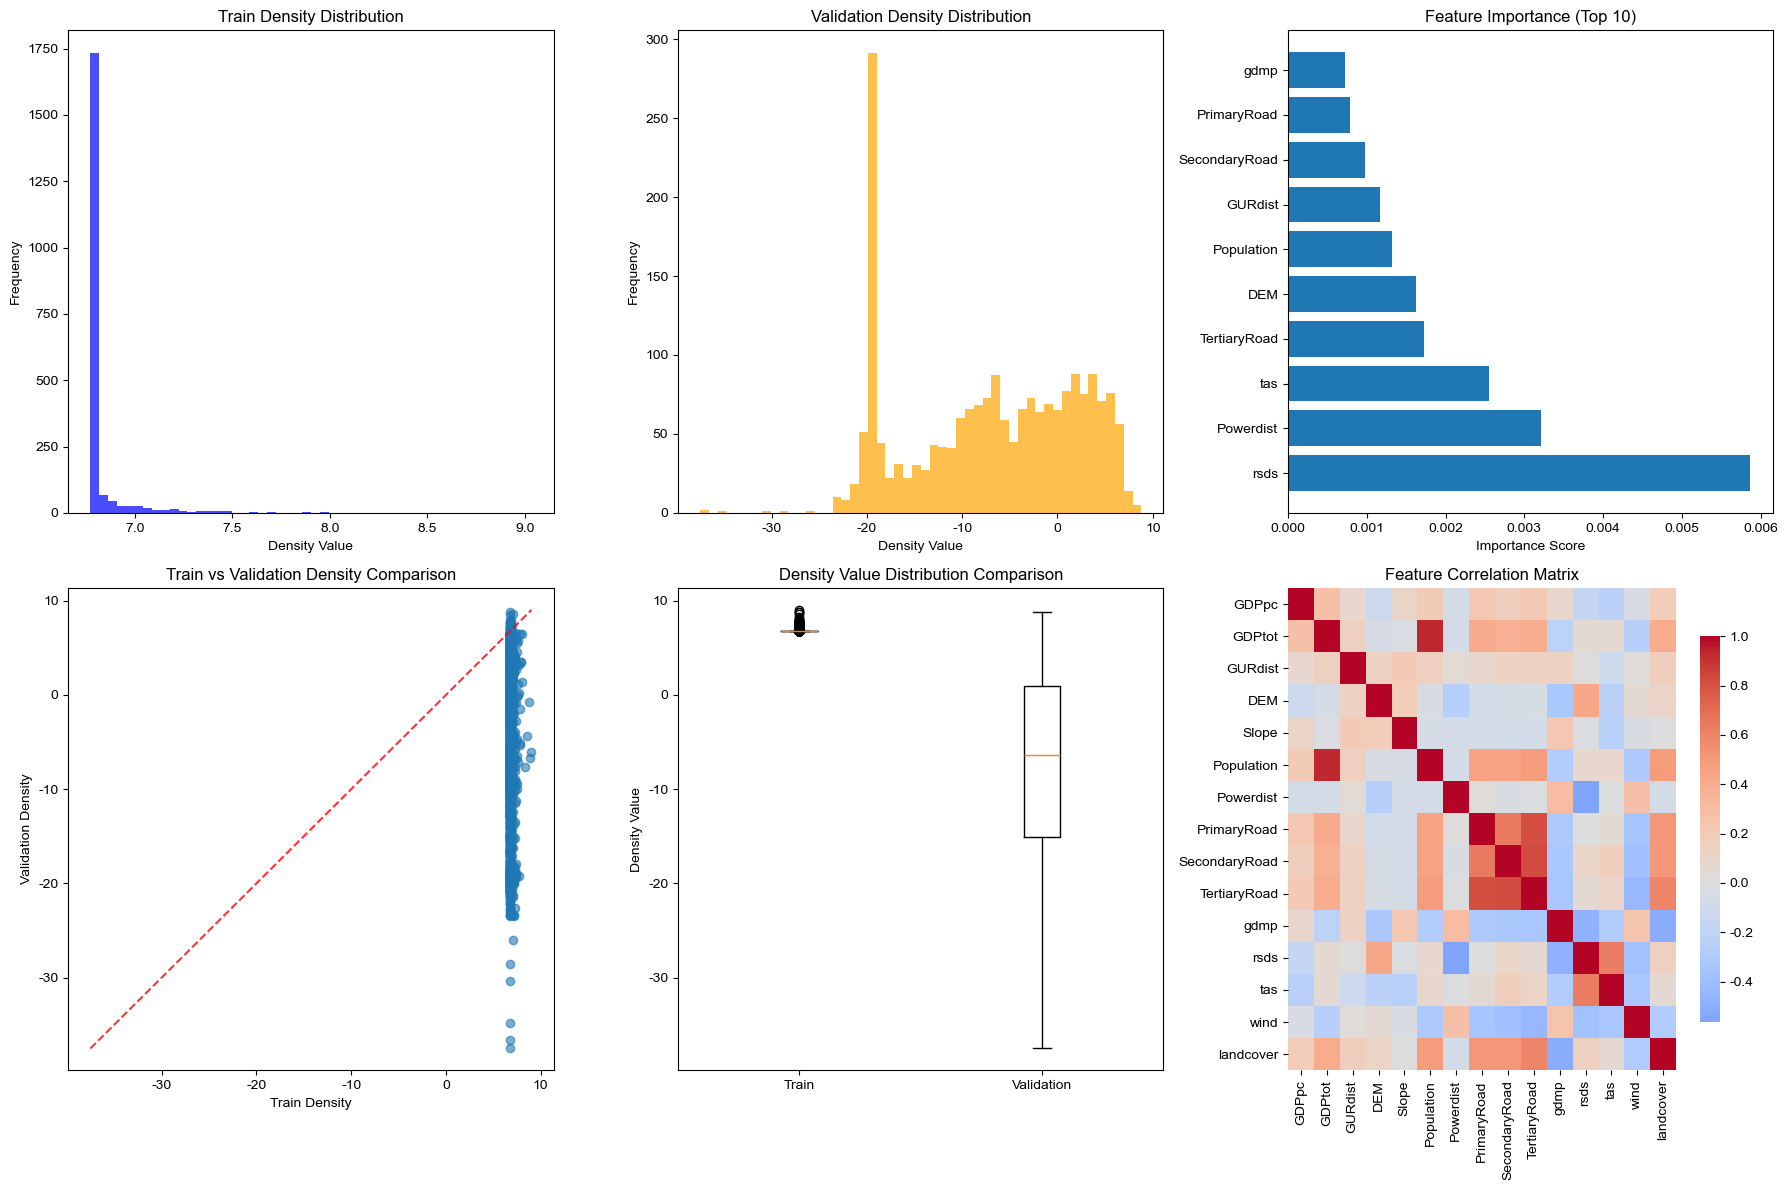

‚úÖ Diagnostic plots generated successfully

7. Overall Evaluation and Suggestions
--------------------------------------------------
Model diagnosis summary:
- Data size: 8121 train samples, 2031 validation samples
- Number of features: 15
- Best bandwidth: 0.200923
- Overfitting degree: Low
Èò∂ÊÆµ‰∏ÄÂÆåÊàêÔºÅ

6. Èò∂ÊÆµ‰∫åÔºöÊ∑±Â∫¶Â≠¶‰π†ÂàÜÁ±ªÂô®ËÆ≠ÁªÉ
--------------------------------------------------

‰ΩøÁî®Âõ∫ÂÆöË¥üÊ†∑Êú¨ÊØî‰æã 0.3 ËøõË°åËÆ≠ÁªÉ...
Enhanced KDE + Deep Learning Hybrid Pipeline
Hybrid KDE + Deep Learning Pipeline
Extracting negative samples from df_abandon (sacrificing some data for generalization)
1. Calculating KDE environmental similarity for all abandoned land...
Number of positive samples: 10152
Target number of negative samples: 3045
Negative sample ratio: 0.3

Dataset split:
  Positive samples: 10152 (PV deployment data)
  Negative samples: 3045 (lowest KDE scoring abandoned land)
  Total training set: 13197
  Positive:Negative ratio: 1:0.30

Prediction data:


ËÆ°ÁÆóË∑ùÁ¶ªÁü©Èòµ: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 65/65 [00:06<00:00, 10.68it/s]


‚úÖ ÂêëÈáèÂåñÂåπÈÖçÂÆåÊàêÔºÅ
  Êú™ËÆ≠ÁªÉÊ†∑Êú¨: 62,193
  Â∑≤ËÆ≠ÁªÉÊ†∑Êú¨: 2,789
ÊÄªÊíÇËçíÂú∞Ê†∑Êú¨: 64,982
ÂèÇ‰∏éËÆ≠ÁªÉÁöÑÊ†∑Êú¨: 2,789
Êú™ÂèÇ‰∏éËÆ≠ÁªÉÁöÑÊ†∑Êú¨: 62,193

üîç Debug - Êï∞ÊçÆÈ™åËØÅ:
  y_test shape: (2640,)
  y_test unique values: [0 1]
  y_pred_test_only shape: (2640, 1)
  y_pred_test_only unique values: [0 1]
  y_test sum: 2031
  y_pred_test_only sum: 2023
  y_test == 1 ÁöÑÊï∞Èáè: 2031
  y_pred_test_only == 1 ÁöÑÊï∞Èáè: 2023

ÔøΩÔøΩ Debug - Â∏ÉÂ∞îËøêÁÆóÈ™åËØÅ:
  y_test == 1 ÁöÑÂΩ¢Áä∂: (2640,)
  y_pred_test_only == 1 ÁöÑÂΩ¢Áä∂: (2640, 1)
  (y_test == 1) & (y_pred_test_only == 1) ÁöÑÂΩ¢Áä∂: (2640, 2640)
  (y_test == 1) & (y_pred_test_only == 1) ÁöÑsum: 4108713
  y_pred_test_only_flat shape: (2640,)

Comprehensive Performance Summary
Training Set Performance:
  Accuracy: 0.9826
  AUC: 0.9969

PU Learning Metrics:
  Modified F1 Score: 1.2705
  Recall: 0.9867
  Detection Prevalence: 0.7663

KDE-Adjusted Metrics:
  ‰º†ÁªüPrecision: 0.9906
  ‰øÆÊ≠£Precision: 0.0764
  ‰º†ÁªüF1:

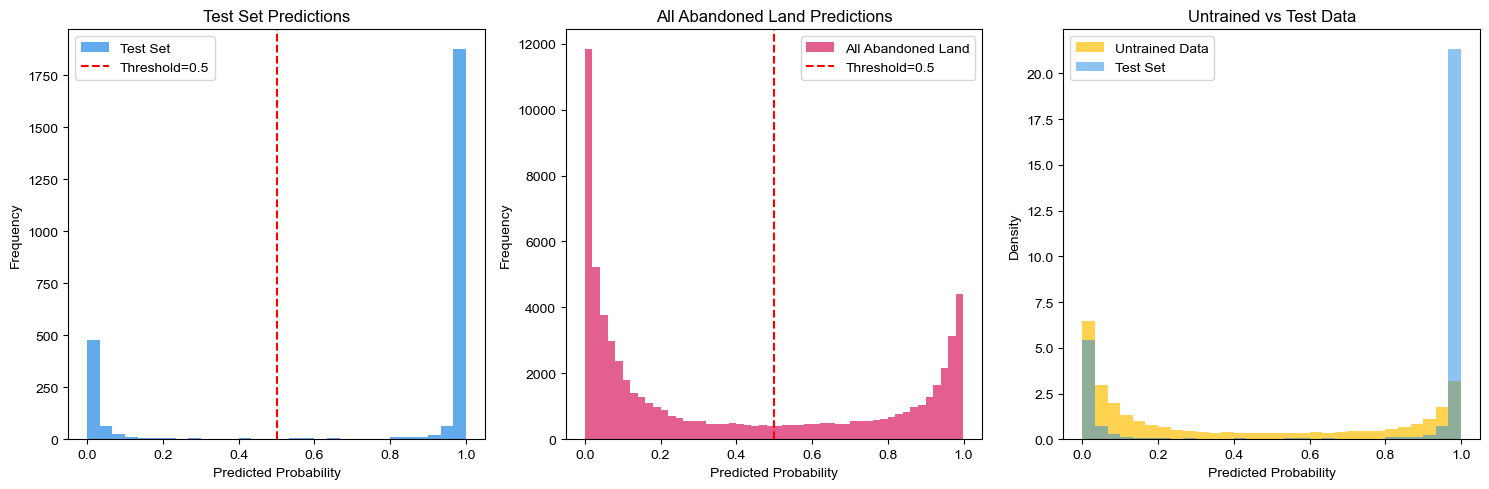

Result Evaluation and Visualization


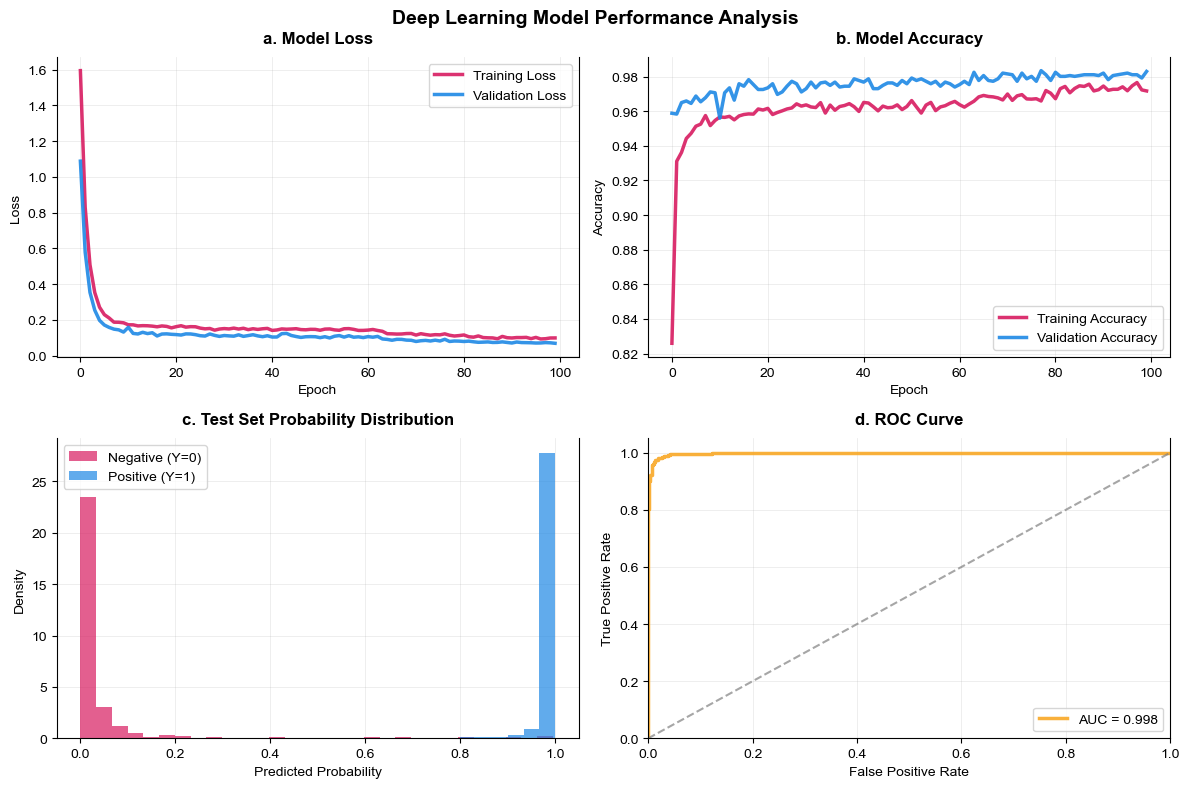


Generating learning curves...
Generating Learning Curves


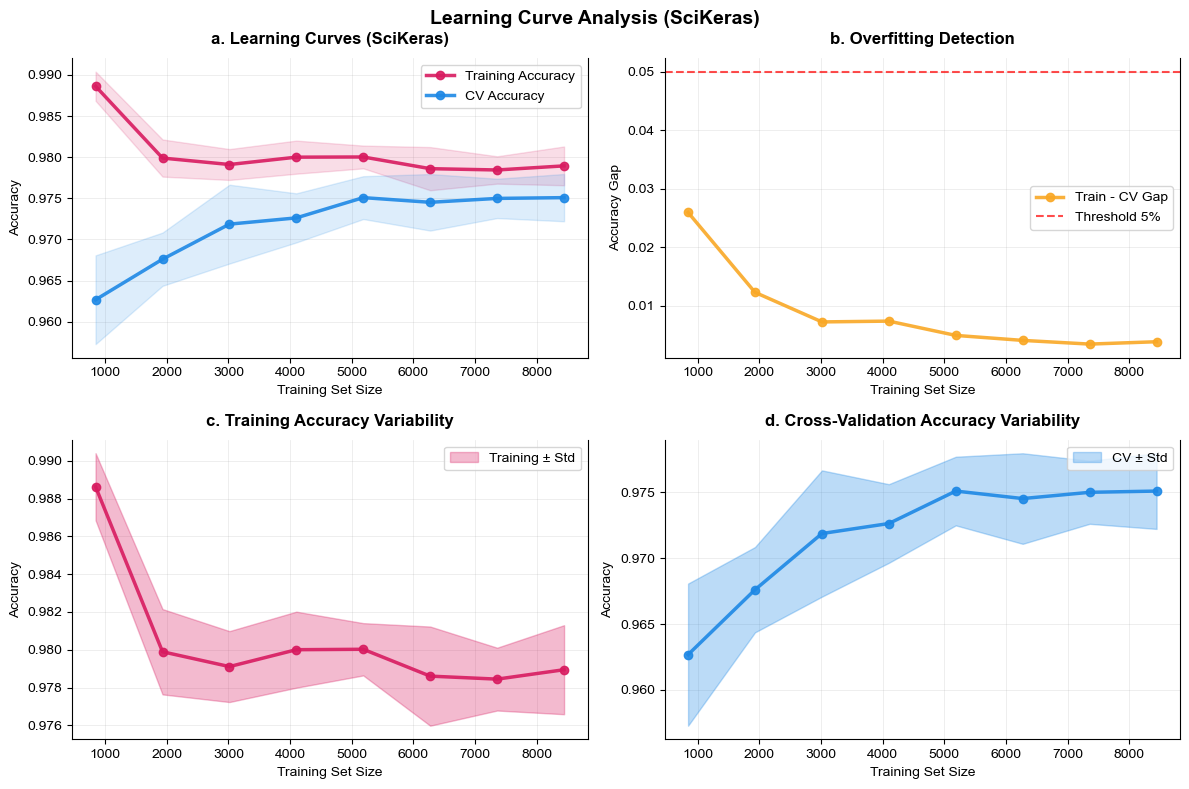


Learning Curve Analysis (SciKeras):
Final training accuracy: 0.9789
Final CV accuracy      : 0.9751
Final accuracy gap     : 0.0039
‚úÖ  No obvious overfitting.

Performing SHAP analysis...
GPU-Accelerated SHAP Analysis (TensorFlow)
‚ùå No GPU devices found, falling back to CPU
CPU Fallback SHAP Analysis
Computing SHAP values on CPU...


  0%|          | 0/2640 [00:00<?, ?it/s]

In [ ]:
from function import *
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
from shapely.geometry import Point

def main():
    """
    ‰∏ªÂáΩÊï∞ÔºöKDE + Ê∑±Â∫¶Â≠¶‰π†Ê∑∑ÂêàÊñπÊ°àÂÆåÊï¥ÊµÅÁ®ã
    """
    print("=" * 80)
    print("KDE + Ê∑±Â∫¶Â≠¶‰π†Ê∑∑ÂêàÊñπÊ°à - ‰∏ªÁ®ãÂ∫è")
    print("=" * 80)
    
    # ==============================
    # 1. Êï∞ÊçÆÂä†ËΩΩÂíåÈ¢ÑÂ§ÑÁêÜ
    # ==============================
    print("\n1. Êï∞ÊçÆÂä†ËΩΩÂíåÈ¢ÑÂ§ÑÁêÜ")
    print("-" * 50)
    
    # ÁæéÂõΩÊú¨ÂúüËæπÁïåÂÆö‰πâ
    usa_bounds_main = {
        'lon_min': -125,  # ÁæéÂõΩÊú¨ÂúüÊúÄË•øÁ´ØÔºàÂçéÁõõÈ°øÂ∑ûÔºâ
        'lon_max': -65,   # ÁæéÂõΩÊú¨ÂúüÊúÄ‰∏úÁ´ØÔºàÁºÖÂõ†Â∑ûÔºâ
        'lat_min': 25,    # ÁæéÂõΩÊú¨ÂúüÊúÄÂçóÁ´ØÔºà‰ΩõÁΩóÈáåËææÂ∑ûÔºâ
        'lat_max': 49     # ÁæéÂõΩÊú¨ÂúüÊúÄÂåóÁ´ØÔºà‰∏éÂä†ÊãøÂ§ßÊé•Â£§Ôºâ
    }

    # Âä†ËΩΩÁæéÂõΩÂ∑ûÁïåÊï∞ÊçÆ
    us_states = gpd.read_file(r'data\cb_2018_us_state_500k.shp')
       
    # Âä†ËΩΩÊ†∏ÂøÉÊï∞ÊçÆ
    print("Âä†ËΩΩÊï∞ÊçÆ...")
    df_abandon = load_abandon(PATHS['us_abandon'])
    df_embedding = load_embedding(PATHS['us_pv_embedding'])
    
    print(f"ÂéüÂßãÊï∞ÊçÆÂ§ßÂ∞è:")
    print(f"  df_abandon: {df_abandon.shape}")
    print(f"  df_embedding: {df_embedding.shape}")

    # ==============================
    # 2. Âú∞ÁêÜËåÉÂõ¥Ë£ÅÂâ™
    # ==============================
    print("\n2. Âú∞ÁêÜËåÉÂõ¥Ë£ÅÂâ™")
    print("-" * 50)
    
    # Á¨¨‰∏ÄÊ¨°Ë£ÅÂâ™Ôºö‰ΩøÁî®ËæπÁïåÊ°Ü
    print("Á¨¨‰∏ÄÊ¨°Ë£ÅÂâ™ÔºöËæπÁïåÊ°ÜË£ÅÂâ™...")
    df_embedding = df_embedding[
        (df_embedding['lon'] >= usa_bounds_main['lon_min']) & 
        (df_embedding['lon'] <= usa_bounds_main['lon_max']) &
        (df_embedding['lat'] >= usa_bounds_main['lat_min']) & 
        (df_embedding['lat'] <= usa_bounds_main['lat_max'])
    ]

    # Á¨¨‰∫åÊ¨°Ë£ÅÂâ™Ôºö‰ΩøÁî®Â∑ûÁïåÂΩ¢Áä∂Êñá‰ª∂ËøõË°åÁ≤æÁ°ÆË£ÅÂâ™
    def clip_data_with_us_states(df, lon_col='lon', lat_col='lat'):
        """
        ‰ΩøÁî®ÁæéÂõΩÂ∑ûÁïåÂΩ¢Áä∂Êñá‰ª∂Ë£ÅÂâ™Êï∞ÊçÆ
        """
        print(f"  Ë£ÅÂâ™Êï∞ÊçÆ: {df.shape} -> ", end="")
        
        # ‰ªéÂùêÊ†áÂàõÂª∫Âá†‰ΩïÁÇπ
        geometry = [Point(xy) for xy in zip(df[lon_col], df[lat_col])]
        
        # ÂàõÂª∫GeoDataFrame
        gdf = gpd.GeoDataFrame(df, geometry=geometry, crs='EPSG:4326')
        
        # Á°Æ‰øùÁæéÂõΩÂ∑ûÁïåÊï∞ÊçÆÂÖ∑ÊúâÁõ∏ÂêåÁöÑCRS
        us_states_4326 = us_states.to_crs('EPSG:4326')
        
        # ÊâßË°åÁ©∫Èó¥ËøûÊé•ÔºåÊâæÂà∞‰Ωç‰∫éÁæéÂõΩÂ∑ûÁïåÂÜÖÁöÑÁÇπ
        clipped_gdf = gpd.sjoin(gdf, us_states_4326, how='inner', predicate='within')
        
        # ÁßªÈô§Âá†‰ΩïÂàóÔºå‰øùÁïôÂéüÂßãÊï∞ÊçÆ
        clipped_df = clipped_gdf.drop(columns=['geometry', 'index_right'])
        
        # ÁßªÈô§ÂèØËÉΩ‰ªéÂΩ¢Áä∂Êñá‰ª∂Ê∑ªÂä†ÁöÑÈ¢ùÂ§ñÂàó
        shapefile_columns = us_states.columns.tolist()
        for col in shapefile_columns:
            if col in clipped_df.columns:
                clipped_df = clipped_df.drop(columns=[col])
        
        print(f"{clipped_df.shape}")
        return clipped_df

    print("Á¨¨‰∫åÊ¨°Ë£ÅÂâ™ÔºöÂ∑ûÁïåÁ≤æÁ°ÆË£ÅÂâ™...")
    df_abandon = clip_data_with_us_states(df_abandon)
    df_embedding = clip_data_with_us_states(df_embedding)

    # ==============================
    # 3. Êï∞ÊçÆÊ∏ÖÊ¥óÂíåÈ¢ÑÂ§ÑÁêÜ
    # ==============================
    print("\n3. Êï∞ÊçÆÊ∏ÖÊ¥óÂíåÈ¢ÑÂ§ÑÁêÜ")
    print("-" * 50)
    
    # Â°´ÂÖÖÁº∫Â§±ÂÄº
    print("Â°´ÂÖÖÁº∫Â§±ÂÄº...")
    df_abandon_fill = fill_nonpositive_with_nearest(df_abandon)
    df_embedding_fill = fill_nonpositive_with_nearest(df_embedding)
    
    # ÂéªÈô§ÈáçÂ§çÂÄº
    print("ÂéªÈô§ÈáçÂ§çÂÄº...")
    df_abandon_filtered = filter_duplicates(df_abandon_fill, df_embedding_fill)
    
    print(f"È¢ÑÂ§ÑÁêÜÂêéÊï∞ÊçÆÂ§ßÂ∞è:")
    print(f"  df_abandon_filtered: {df_abandon_filtered.shape}")
    print(f"  df_embedding_fill: {df_embedding_fill.shape}")

    # ==============================
    # 4. ÁâπÂæÅÂ∑•Á®ã
    # ==============================
    print("\n4. ÁâπÂæÅÂ∑•Á®ã")
    print("-" * 50)
    
    # ÂÆö‰πâÁâπÂæÅÂàóÔºàÊéíÈô§ÂùêÊ†áÂàóÔºâ
    features_no_coords = [f for f in NUMERIC_FEATURES + CAT_COLS if f not in ['lat', 'lon']]
    print(f"ÁâπÂæÅÊï∞Èáè: {len(features_no_coords)}")
    print(f"ÁâπÂæÅÂàóË°®: {features_no_coords}")

    # ==============================
    # 5. Èò∂ÊÆµ‰∏ÄÔºöKDEÊ®°ÂûãËÆ≠ÁªÉÂíåËØäÊñ≠
    # ==============================
    print("\n5. Èò∂ÊÆµ‰∏ÄÔºöKDEÊ®°ÂûãËÆ≠ÁªÉÂíåËØäÊñ≠")
    print("-" * 50)
    
    print("ËÆ≠ÁªÉKDEÊ®°Âûã...")
    kde_pipe = select_and_train_kde(
        df_embedding_fill[features_no_coords], 
        bandwidths=np.logspace(-3, 3, 100)
    )
    
    print("ËøõË°åKDEÊ®°ÂûãÁªºÂêàËØäÊñ≠...")
    diagnosis_results = comprehensive_model_diagnosis_fixed(
        df_embedding=df_embedding_fill,
        df_abandon=df_abandon_filtered,
        features_no_coords=features_no_coords,
        test_size=0.2,
        random_state=42
    )
    
    print("Èò∂ÊÆµ‰∏ÄÂÆåÊàêÔºÅ")

    # ==============================
    # 6. Èò∂ÊÆµ‰∫åÔºöÊ∑±Â∫¶Â≠¶‰π†ÂàÜÁ±ªÂô®ËÆ≠ÁªÉ
    # ==============================
    print("\n6. Èò∂ÊÆµ‰∫åÔºöÊ∑±Â∫¶Â≠¶‰π†ÂàÜÁ±ªÂô®ËÆ≠ÁªÉ")
    print("-" * 50)
    
    # Áõ¥Êé•Áî®ratio=0.3ËøõË°åËÆ≠ÁªÉÂíåËæìÂá∫
    ratio = 0.3
    print(f"\n‰ΩøÁî®Âõ∫ÂÆöË¥üÊ†∑Êú¨ÊØî‰æã {ratio} ËøõË°åËÆ≠ÁªÉ...")
    final_results = run_hybrid_kde_dl_pipeline_enhanced(
        df_embedding=df_embedding_fill,
        df_abandon=df_abandon_filtered,
        features_no_coords=features_no_coords,
        kde_pipe=kde_pipe,
        negative_ratio=ratio,
        test_size=0.2,
        epochs=100,
        random_state=42
    )

    if final_results is not None:
        # ‰øÆÂ§çÔºö‰ΩøÁî®Ë¥üÊ†∑Êú¨Âä†ÂõûÂêéÁöÑÂÆåÊï¥ËæìÂá∫
        final_df = final_results['final_output']['df_final_output'].copy()
        
        # ‰øùÂ≠òÂÆåÊï¥ÁªìÊûúÔºàÂåÖÂê´Ë¥üÊ†∑Êú¨ÂíåÈ¢ÑÊµãÁªìÊûúÔºâ
        output_filename = f'output/final_pv_suitability_best_ratio_{ratio}.csv'
        final_df.to_csv(output_filename, index=False)
        
        print(f"\nüéØ Ê®°ÂûãËÆ≠ÁªÉÂÆåÊàêÔºÅ")
        print(f"Ë¥üÊ†∑Êú¨ÊØî‰æã: {ratio}")
        print(f"ÊúÄÁªàËæìÂá∫Ê†∑Êú¨Êï∞Èáè: {len(final_df)}")
        print(f"  - Ë¥üÊ†∑Êú¨ (Y=0): {len(final_results['final_output']['df_negative_full'])}")
        print(f"  - Ê®°ÂûãÈ¢ÑÊµã: {len(final_results['final_output']['df_prediction_full'])}")
        print(f"ÁªìÊûúÂ∑≤‰øùÂ≠òÂà∞: {output_filename}")
        
        # ÊòæÁ§∫Ê¶ÇÁéáÂàÜÂ∏ÉÁªüËÆ°
        print(f"\nÊ¶ÇÁéáÂàÜÂ∏ÉÁªüËÆ°:")
        print(f"  - Ë¥üÊ†∑Êú¨Ê¶ÇÁéá (Âõ∫ÂÆö‰∏∫0.0): {len(final_df[final_df['pv_suitability_prob'] == 0.0])}")
        print(f"  - È¢ÑÊµãÊ¶ÇÁéá > 0.5: {len(final_df[final_df['pv_suitability_prob'] > 0.5])}")
        print(f"  - È¢ÑÊµãÊ¶ÇÁéá ‚â§ 0.5: {len(final_df[(final_df['pv_suitability_prob'] > 0.0) & (final_df['pv_suitability_prob'] <= 0.5)])}")
        print(f"  - Âπ≥ÂùáÈ¢ÑÊµãÊ¶ÇÁéá: {final_df[final_df['pv_suitability_prob'] > 0.0]['pv_suitability_prob'].mean():.4f}")
        
        # ‰øùÂ≠òËØ¶ÁªÜÁªìÊûú
        detailed_results = {
            'best_ratio': ratio,
            'model_performance': final_results['performance'],
            'sacrifice_info': final_results['sacrifice_info'],
            'final_output_summary': {
                'total_samples': len(final_df),
                'negative_samples': len(final_results['final_output']['df_negative_full']),
                'predicted_samples': len(final_results['final_output']['df_prediction_full']),
                'mean_probability': final_df[final_df['pv_suitability_prob'] > 0.0]['pv_suitability_prob'].mean()
            }
        }
        
        # ‰øùÂ≠òËØ¶ÁªÜÁªìÊûúÂà∞JSONÊñá‰ª∂
        import json
        with open(f'output/detailed_results_ratio_{ratio}.json', 'w') as f:
            json.dump(detailed_results, f, indent=2, default=str)
        
        print(f"ËØ¶ÁªÜÁªìÊûúÂ∑≤‰øùÂ≠òÂà∞: output/detailed_results_ratio_{ratio}.json")
        
    else:
        print("‚ùå ÊúÄÁªàËÆ≠ÁªÉÂ§±Ë¥•")
    


   

    # ==============================
    # 7. È¢ùÂ§ñÂàÜÊûêÔºöKDEËØÑÂàÜÂàÜÂ∏É
    # ==============================
    print("\n8. È¢ùÂ§ñÂàÜÊûêÔºöKDEËØÑÂàÜÂàÜÂ∏É")
    print("-" * 50)
    
    try:
        # ËÆ°ÁÆóÊâÄÊúâÊíÇËçíÂú∞ÁöÑKDEËØÑÂàÜ
        print("ËÆ°ÁÆóÊâÄÊúâÊíÇËçíÂú∞ÁöÑKDEËØÑÂàÜ...")
        dens, env_scores = score_env(
            kde_pipe, 
            df_abandon_filtered[features_no_coords], 
            method='sigmoid', 
            sigmoid_alpha=0.5
        )
        
        # ÂèØËßÜÂåñKDEËØÑÂàÜÂàÜÂ∏É
        plt.figure(figsize=(15, 5))
        
        # ÂéüÂßãÂØÜÂ∫¶ÂàÜÂ∏É
        plt.subplot(131)
        plt.hist(dens, bins=50, density=True)
        plt.yscale('log')
        plt.title('ÂéüÂßãÂØÜÂ∫¶ÂàÜÂ∏É (ÂØπÊï∞ÂàªÂ∫¶)')
        plt.xlabel('ÂØÜÂ∫¶ÂÄº')
        plt.ylabel('È¢ëÁéá (ÂØπÊï∞)')
        
        # ÂΩí‰∏ÄÂåñÂêéÁöÑÂæóÂàÜÂàÜÂ∏É
        plt.subplot(132)
        plt.hist(env_scores, bins=50, density=True)
        plt.title('ÂΩí‰∏ÄÂåñÂæóÂàÜÂàÜÂ∏É')
        plt.xlabel('ÂæóÂàÜ')
        plt.ylabel('È¢ëÁéá')
        
        # ÂæóÂàÜÂàÜÂ∏ÉÁÆ±Á∫øÂõæ
        plt.subplot(133)
        plt.boxplot(env_scores)
        plt.title('KDEÂæóÂàÜÂàÜÂ∏ÉÁÆ±Á∫øÂõæ')
        plt.ylabel('ÂæóÂàÜ')
        
        plt.tight_layout()
        plt.savefig('output/kde_score_distribution.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        print("KDEËØÑÂàÜÂàÜÂ∏ÉÂõæÂ∑≤‰øùÂ≠òÂà∞: output/kde_score_distribution.png")
        
    except Exception as e:
        print(f"‚ùå KDEËØÑÂàÜÂàÜÂ∏ÉÂàÜÊûêÂ§±Ë¥•: {e}")

    print("\n" + "=" * 80)
    print("‰∏ªÁ®ãÂ∫èÊâßË°åÂÆåÊàêÔºÅ")
    print("=" * 80)

if __name__ == '__main__':
    main()

    
    
    

# Ê®°Âûã‰øùÂ≠ò‰∏éËæìÂá∫

In [ ]:
df_embedding_fill[features_no_coords]
df_abandon_filtered[features_no_coords]

In [ ]:
# Â∞Üenv_scoresÂåπÈÖçÂà∞ÂéüÂßãÊ†∑Êú¨ÁöÑÁªèÁ∫¨Â∫¶‰∏äÂπ∂‰øùÂ≠ò
df_abandon_filtered['env_scores'] = env_scores
# Try saving with different encoding
df_abandon_filtered.to_csv('./data/abandon_filtered_with_scores.csv', index=False)# ÁªòÂà∂Âú∞Âõæ
plt.figure(figsize=(10,6))

# ÁªòÂà∂ÂæÖÈ¢ÑÊµãÁÇπ
plt.scatter(df_abandon_filtered['lon'], df_abandon_filtered['lat'], 
           c=df_abandon_filtered['env_scores'], cmap='viridis',
           alpha=0.5, label='Prediction Points')

# Âè†Âä†ËÆ≠ÁªÉÊ†∑Êú¨ÁÇπ
plt.scatter(df_embedding_fill['lon'], df_embedding_fill['lat'],
           color='red', alpha=0.5, s=20, label='Training Points')

plt.colorbar(label='Environmental Scores')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Spatial Distribution of Environmental Scores')
plt.legend()
plt.show()

In [ ]:
df_abandon